# Основны статистики

## Введение

### Генеральная совокупность и выборки

Генеральная совокупность &ndash; совокупность всех объектов, относительно которых предполагается делать выводы при изучении конкретной задачи.

Выборка (выборочная совокупность) &ndash; часть геренальной совокупности, которая охватывается экспериментом.

Репрезентативная выборка & такая выборка, которая отражает все основные признаки генеральной совокупности, к которой принадлежит.

#### Способы создания репрезентативной выборки

- Простая случайная выборка: случайный отбор испытуемых из генеральной совокупности
- Стратифицированная выборка: разбиение генеральной совокупности на несколько групп (страт), затем из каждой страты случайным образом выбирается одинаковое количество объектов.
- Групповая выборка: разбиение генеральной совокупности на несколько групп (кластеров), схожих по показателям, затем случайным образом выбираются объекты из одного или нескольких кластеров.

| Стратифицированная |      Групповая     |
|--------------------|--------------------|
| Объекты включаются в выборку из всех страт | Объекты включаются в выборку из одного или нескольких кластеров |
| Страты не однородны по значению исследуемого признака, но элементы внутри страты - однородны | Кластеры однородны по значению исследуемого признака, но элементы в внутри кластера - не однородны |
| Повышает валидность выборки при неоднородности групп в генеральной совокупности | Уменьшает стоимость исследования |

##### Визуализация способов создания репрезентативной выборки

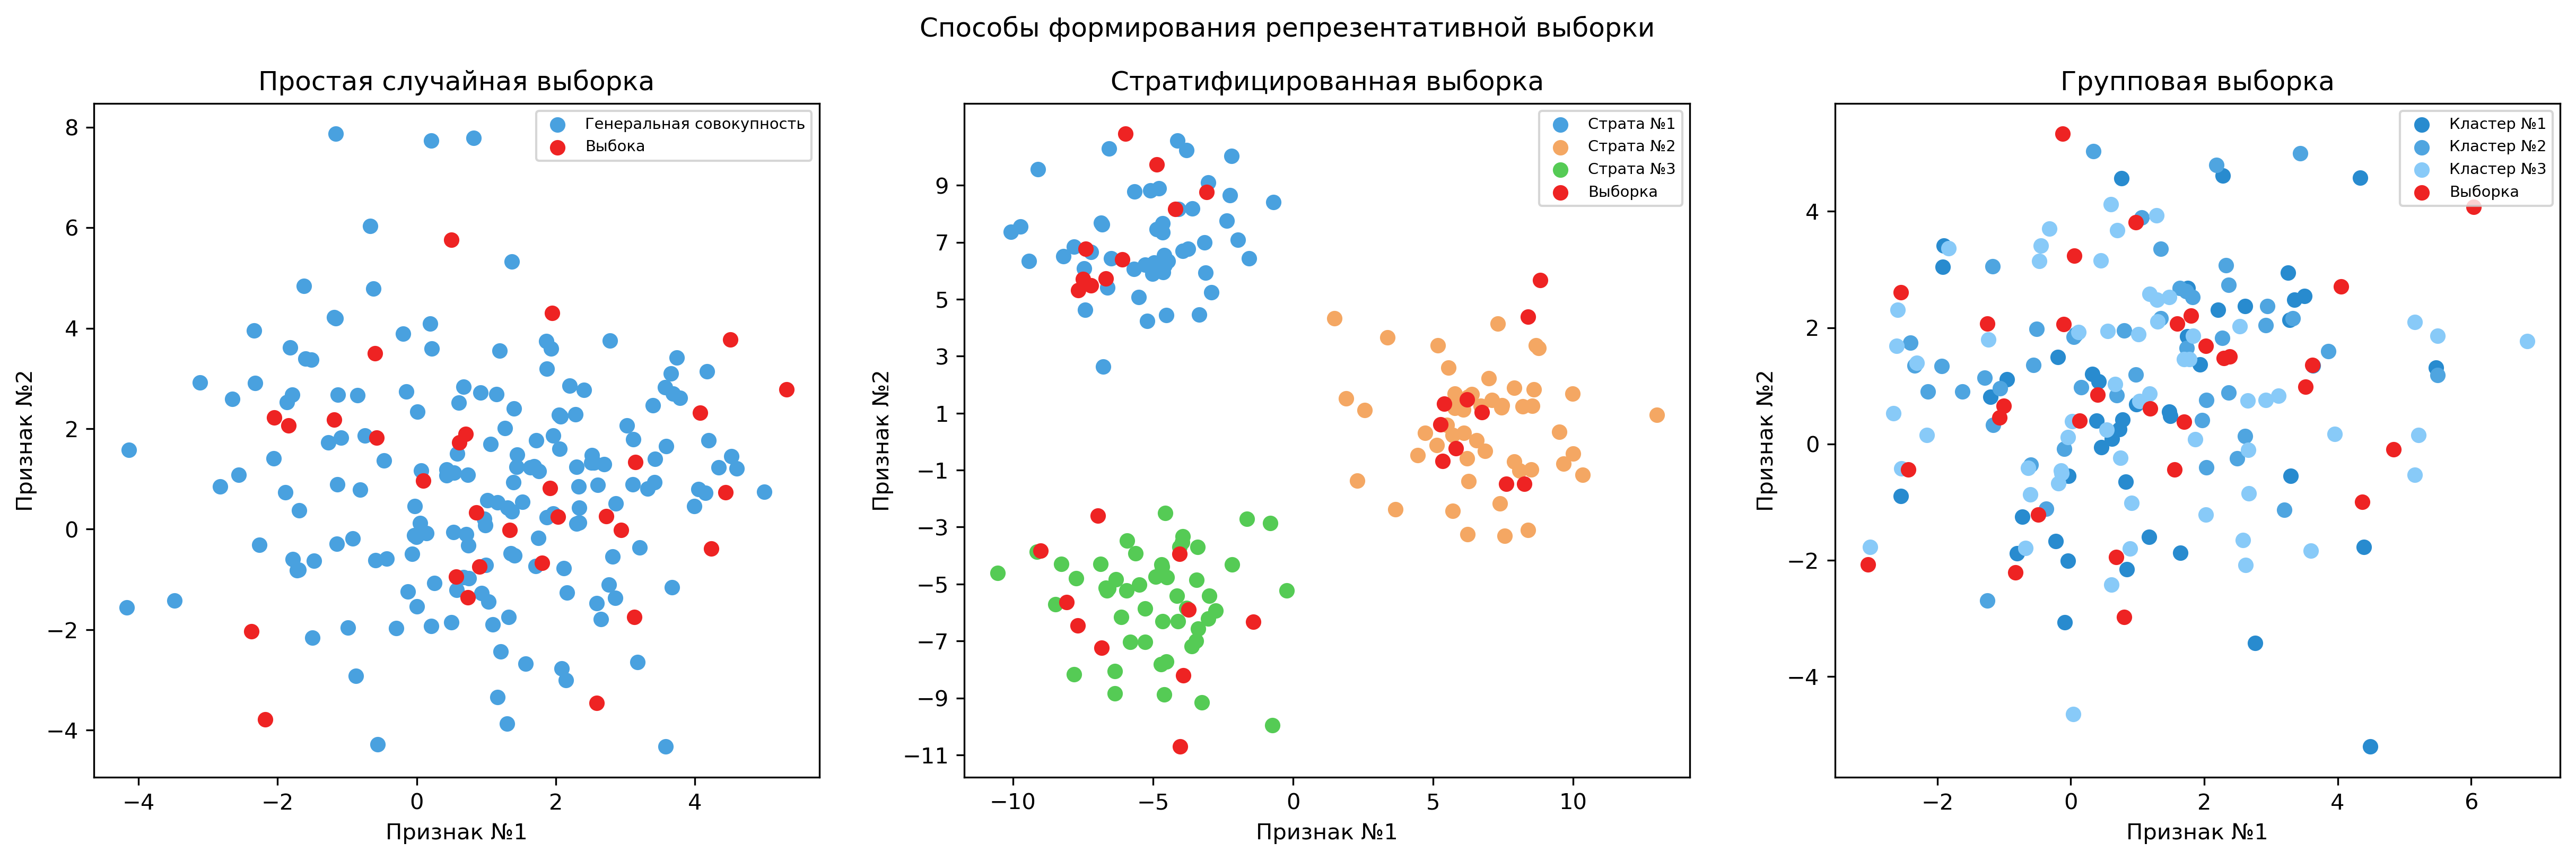

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(20, 5.5),
    dpi=300.0,
    subplot_kw={'xlabel': 'Признак №1',
                'ylabel': 'Признак №2'}
)

fig.suptitle('Способы формирования репрезентативной выборки')

#############################
# Простая случайная выборка #
#############################
population = np.random.normal(1, 2, (200, 2))

# Создаем случайную выборку и удаляем ее элементы из генеральной совокупности
# для корректной визуализации
indices = np.random.choice(population.shape[0], size=30, replace=False)
sample = population[indices]
not_in_sample = np.delete(population, indices, axis=0)

ax1_gen = ax1.scatter(not_in_sample[:, 0], not_in_sample[:, 1], c='#49a1df')
ax1_sample = ax1.scatter(sample[:, 0], sample[:, 1], c='#ee2323')

ax1_gen.set_label('Генеральная совокупность')
ax1_sample.set_label('Выбока')

ax1.set_title('Простая случайная выборка')
ax1.legend(fontsize='x-small')
ax1.set_xlabel('Признак №1')
ax1.set_ylabel('Признак №2')

##############################
# Стратифицированная выборка #
##############################
group_1 = np.random.normal(1, 2, (60, 2))
group_2 = np.random.normal(1, 2, (60, 2))
group_3 = np.random.normal(1, 2, (60, 2))

# Создаем разнородность страт
group_1[:, 0] -= 6
group_1[:, 1] += 6
group_2[:, 0] += 6
group_3[:, 0] -= 6
group_3[:, 1] -= 6

# Выбираем элементы из всех страт
indices_1 = np.random.choice(group_1.shape[0], size=10, replace=False)
indices_2 = np.random.choice(group_2.shape[0], size=10, replace=False)
indices_3 = np.random.choice(group_3.shape[0], size=10, replace=False)

# Объединяем элементы страт в выборку и удаляем их из страт
# для корректной визуализации
sample = np.concat((group_1[indices_1], group_2[indices_2], group_3[indices_3]))
grp_1 = np.delete(group_1, indices_1, axis=0)
grp_2 = np.delete(group_2, indices_2, axis=0)
grp_3 = np.delete(group_3, indices_3, axis=0)

ax2_grp_1 = ax2.scatter(grp_1[:, 0], grp_1[:, 1], c='#49a1df')
ax2_grp_2 = ax2.scatter(grp_2[:, 0], grp_2[:, 1], c='#f4a763')
ax2_grp_3 = ax2.scatter(grp_3[:, 0], grp_3[:, 1], c='#55cb55')
ax2_sample = ax2.scatter(sample[:, 0], sample[:, 1], c='#ee2323')

ax2_grp_1.set_label('Страта №1')
ax2_grp_2.set_label('Страта №2')
ax2_grp_3.set_label('Страта №3')
ax2_sample.set_label('Выборка')

ax2.legend(fontsize='x-small')
ax2.set_title('Стратифицированная выборка')
ax2.set_yticks(np.arange(floor(min(group_3[:, 1])), ceil(max(group_1[:, 1])), 2))

#####################
# Групповая выборка #
#####################
group_1 = np.random.normal(1, 2, (60, 2))
group_2 = np.random.normal(1, 2, (60, 2))
group_3 = np.random.normal(1, 2, (60, 2))

# Выбираем элементы из 1 и 2 кластеров
indices_1 = np.random.choice(group_1.shape[0], size=15, replace=False)
indices_2 = np.random.choice(group_2.shape[0], size=15, replace=False)

# Объединяем выборки из кластеров в одну и удаляем элементы из кластеров для корректной визуализации
sample = np.concatenate((group_1[indices_1], group_2[indices_2]))
group_1 = np.delete(group_1, indices_1, axis=0)
group_2 = np.delete(group_2, indices_2, axis=0)

ax3_grp_1 = ax3.scatter(group_1[:, 0], group_1[:, 1], c='#288bcf')
ax3_grp_2 = ax3.scatter(group_2[:, 0], group_2[:, 1], c='#4fa5e0')
ax3_grp_3 = ax3.scatter(group_3[:, 0], group_3[:, 1], c='#88caf8')
ax3_sample = ax3.scatter(sample[:, 0], sample[:, 1], c='#ee2323')

ax3_grp_1.set_label('Кластер №1')
ax3_grp_2.set_label('Кластер №2')
ax3_grp_3.set_label('Кластер №3')
ax3_sample.set_label('Выборка')

ax3.set_title('Групповая выборка')
ax3.set_xlabel('Признак №1')
ax3.set_ylabel('Признак №2')
ax3.legend(fontsize='x-small')

plt.show()

### Типы переменных

- Количественные - измеренные значения признаков:
  - Непрерывные - переменные, принимающие любые значения в заданном диапазоне.
  - Дискретные - переменные, принимающие только целочисленные значения.
- Номинативные - принимают значения, не несущие математического смысла.
- Ранговые - принимают значения, отражающие отношение между ними (места в забеге)

### Описательная статистика

Описательная статистика - это раздел статистики, предоставляющий методы систематизации и визуализации эмпирических данных в виде графиков и таблиц, а также их количественным описанием посредством основных статистических показателей.

Методы аггрегирования данных:
- Табличное представление - система строк и столбцов, в которой излагается статистическая информация о эмпирических данных.
- Графическое изображение - изображение статистической информации с помощью диаграмм, графиков и тд.
- Рассчет статистических показателей.

Сводные статистические характеристики - это значения, рассчитанные на основе выборки наблюдений, и описывающие ее. Выделяют 3 категории:
1. Меры центральной тенденции:
   - Среднее значение (математическое ожидание)
   - Медиана
   - Мода
2. Меры изменчивостиДоверительный:
   - Дисперсия
   - Среднеквадратичное отклонение
   - Min, Max
   - Интерквартильный размах
   - Размах
   - Интервал
   - Доверительный интервал
4. Меры формы:
   - Коэффициент ассиметрии
   - Коэффициент перекоса

#### Меры центральной тенденции

Медиана - число, находящееся в середине упорядоченного числового ряда. Обозначается $Me$

Мода - одно или несколько значений, во множесте наблюдений, которые встречаются наиболее часто. Обозначаетя $Mo$

Среднее значение (в случае независимых наблюдений равняется математическому ожиданию) - некоторое число, заключенное между наименьшим и наибольшим из их значений, представляющее собой обобщение значения признака по его абсолютному значению. Обозначается $\bar{X}$, $\langle X \rangle$ или $M$ (в случае генеральной совокупности).
$$\large \bar{X} = \frac{\sum_{i=1}^n x_i}{n} $$

Свойства среднего значения:
$$\large \bar{X}_{X + c} = \frac{\sum_{i = 1}^n (x_i + c)}{n} = \frac{\sum_{i = 1}^n x_i}{n} + \frac{\sum_{i = 1}^n c}{n} = \bar{X} + \frac{nc}{n} = \bar{X} + c $$
$$\large \bar{X}_{X * c} = \frac{\sum_{i = 1}^n (x_i * c)}{n} = \frac{c * \sum_{i = 1}^n x_i}{n} = c * \bar{X} $$
$$\large \sum_{i = 1}^n (x_i - \bar{X}) = n\bar{X} - n\bar{X} = 0 $$

##### Рассчет мер центральной тенденции на Python

In [2]:
import numpy as np
import scipy.stats as stats

data = np.array([157, 159, 161, 164, 165, 166, 167, 167, 167, 168,
                 169, 169, 170, 170, 170, 171, 171, 172, 172, 172,
                 172, 173, 173, 175, 175, 177, 178, 178, 179, 185])

print(f'Среднее значение выборки: {data.mean()}')
print(f'Медиана выборки: {np.median(data)}')
print(f'Мода выборки: {stats.mode(data)[0]}')

Среднее значение выборки: 170.4
Медиана выборки: 170.5
Мода выборки: 172


##### Проверка свойств среднего значения на Python

In [3]:
c = 5

data_plus_c = data + c
data_mul_c = data * c

mean_plus_c = np.mean(data) + c
mean_mul_c = np.mean(data) * c
sum_data_dev = round(sum(data - np.mean(data)))

print(f'mean(data) + c = {mean_plus_c}, mean(data_plus_c) = {np.mean(data_plus_c)}')
print(f'mean(data) * c = {mean_mul_c}, mean(data_mul_c) = {np.mean(data_mul_c)}')
print(f'sum of data deviation from mean = {sum_data_dev}')

mean(data) + c = 175.4, mean(data_plus_c) = 175.4
mean(data) * c = 852.0, mean(data_mul_c) = 852.0
sum of data deviation from mean = 0


#### Меры изменчивости

##### Размах

Размах (Range) - разность максимального и минимального значения признака, обозначается $R$.

##### Дисперсия и стандартное отклонение

Дисперсия (Variance) - средний квадрат отклонений значений признака от сренего значения, обозначается $D$.  
Формула для генеральной совокупности:  
$$\large D = \frac{\sum_{i = 1}^n (x_i - \bar{X})^2}{n} $$  
Формуля для выборки (степени свободы в знаменателе):  
$$\large D = \frac{\sum_{i = 1}^n (x_i - \bar{X})^2}{n - 1} $$

Среднеквадратическое или стандартное отклонение (Standart deviation) - корень из дисперсии. Показывает реальное усредненное отклонение значений от среднего, обозначается $\sigma$ у генеральной совокупности и $sd$ у выборки.

Свойства дисперсии и стандартного отклонения:
$$\large D_{X + c} = D_X $$
$$\large sd_{X + c} = sd_X $$

$$\large D_{X * c} = D_X * c^2 $$
$$\large sd_{X * c} = sd_X * c $$

In [4]:
import numpy as np

data = np.array([157, 159, 161, 164, 165, 166, 167, 167, 167, 168,
                 169, 169, 170, 170, 170, 171, 171, 172, 172, 172,
                 172, 173, 173, 175, 175, 177, 178, 178, 179, 185])

print(f'Дисперсия выборки: {np.var(data, ddof=1)}')

print(f'Стандартное отклонение выборки: {np.std(data, ddof=1)}')

Дисперсия выборки: 36.04137931034482
Стандартное отклонение выборки: 6.0034472855472645


##### Квантили распределения

Квантиль - значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

Процентиль - квантиль, харакетризующий распределение величин совокупности, при котором 99 значений процентиля делят совокупность на 100 равных частей.

Квартиль - квантиль, харакетризующий распределение величин совокупности, при котором 3 значения квартиля делят совокупность на 4 равных части, обозначаются $Q1$, $Q2$, $Q3$

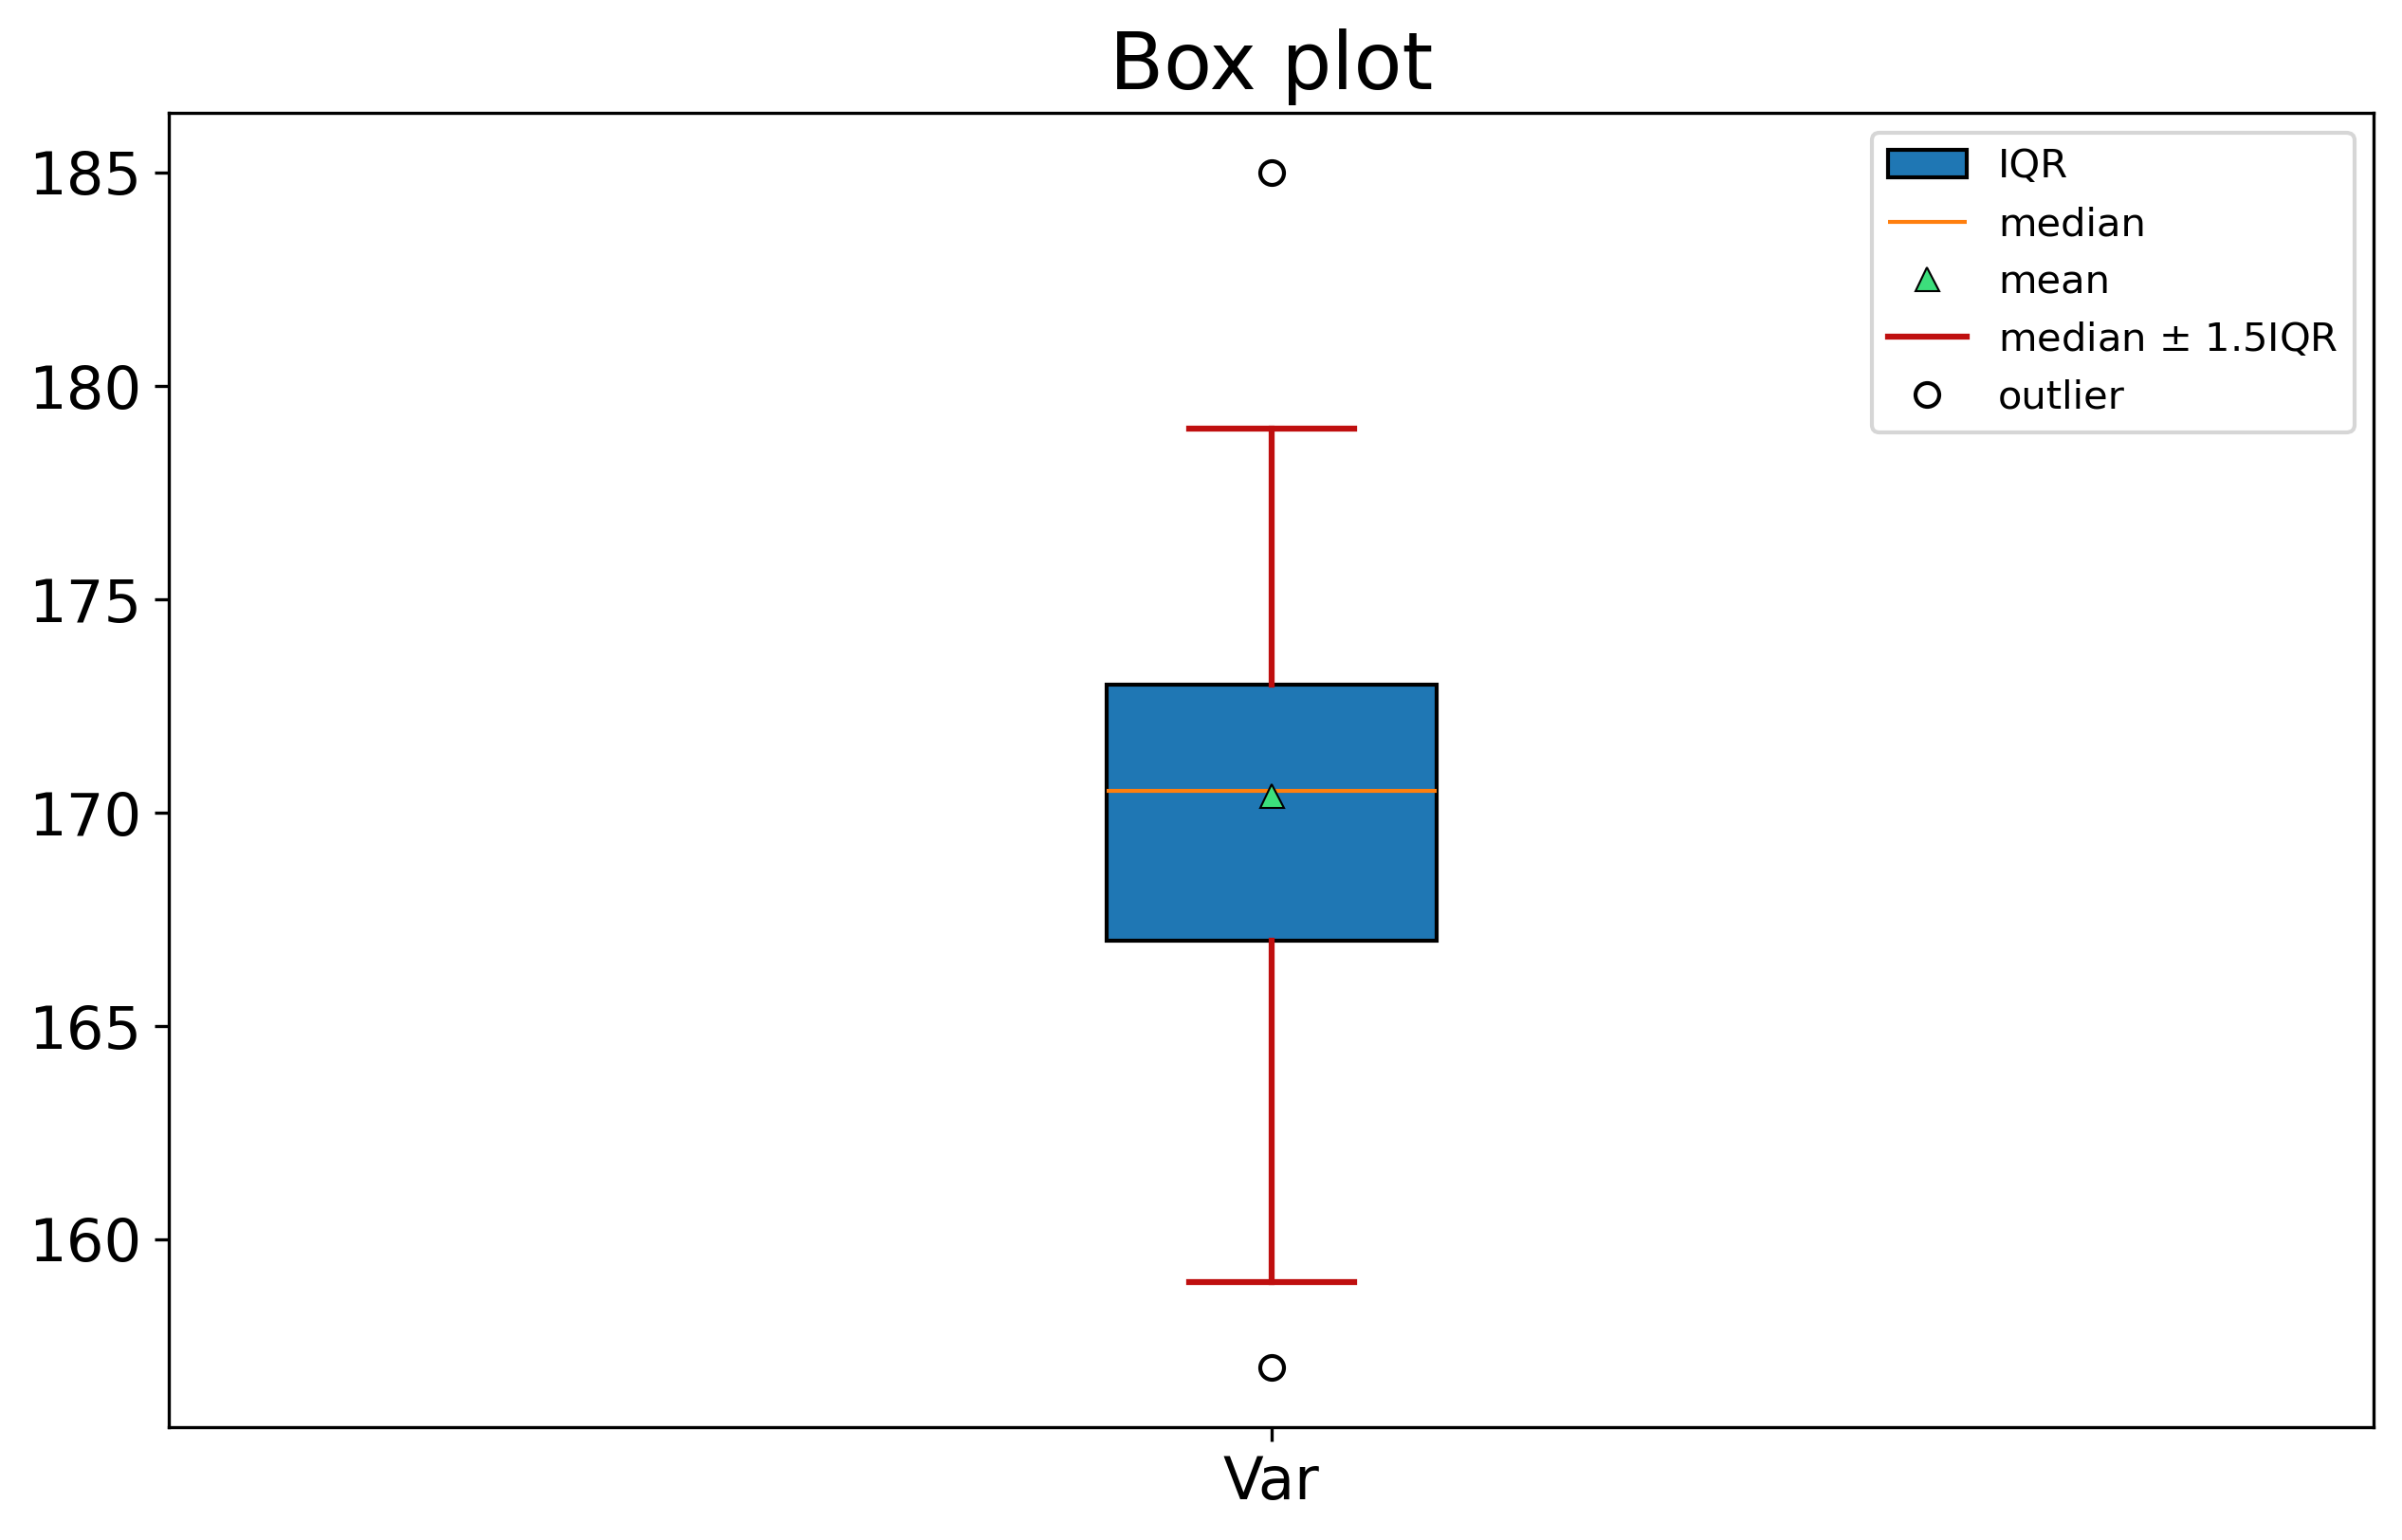

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([157, 159, 161, 164, 165, 166, 167, 167, 167, 168,
                 169, 169, 170, 170, 170, 171, 171, 172, 172, 172,
                 172, 173, 173, 175, 175, 177, 178, 178, 179, 185])

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

ax.set_title('Box plot')
ax.title.set_size(20)
ax.tick_params(axis='both', labelsize=15)

bp = ax.boxplot(
    data,
    showmeans=True,
    meanprops={'markerfacecolor': '#3cdf7c',
               'markeredgecolor': 'black',
               'markeredgewidth': 0.5},
    tick_labels=['Var'],
    patch_artist=True
)

for whisker, cap in zip(bp['whiskers'], bp['caps']):
    whisker.set_color('#bf0f0f')
    whisker.set_linewidth(1.5)
    cap.set_color('#bf0f0f')
    cap.set_linewidth(1.5)

ax.legend([bp['boxes'][0], bp['medians'][0], bp['means'][0], bp['whiskers'][0], bp['fliers'][0]],
           ['IQR', 'median', 'mean', 'median $\\pm$ 1.5IQR', 'outlier'])

plt.show()

### Нормальное распределение

Характеристика нормального распределения:
- Унимодально (одна мода)
- Симметрично
- Отклонения подчиняются определенному вероятносному закону (правила 2-х и 3-х сигм)

Правила 2-x и 3-х сигм - вероятностный закон, определяющий вероятность встретить значение, отклоняющееся от среднего на 1, 2 и 3 $\sigma$.
- $M_X \pm 1\sigma \approx 68\% \text{ наблюдений}$
- $M_X \pm 2\sigma \approx 95\% \text{ наблюдений}$
- $M_X \pm 3\sigma \approx 100\% \text{ наблюдений}$

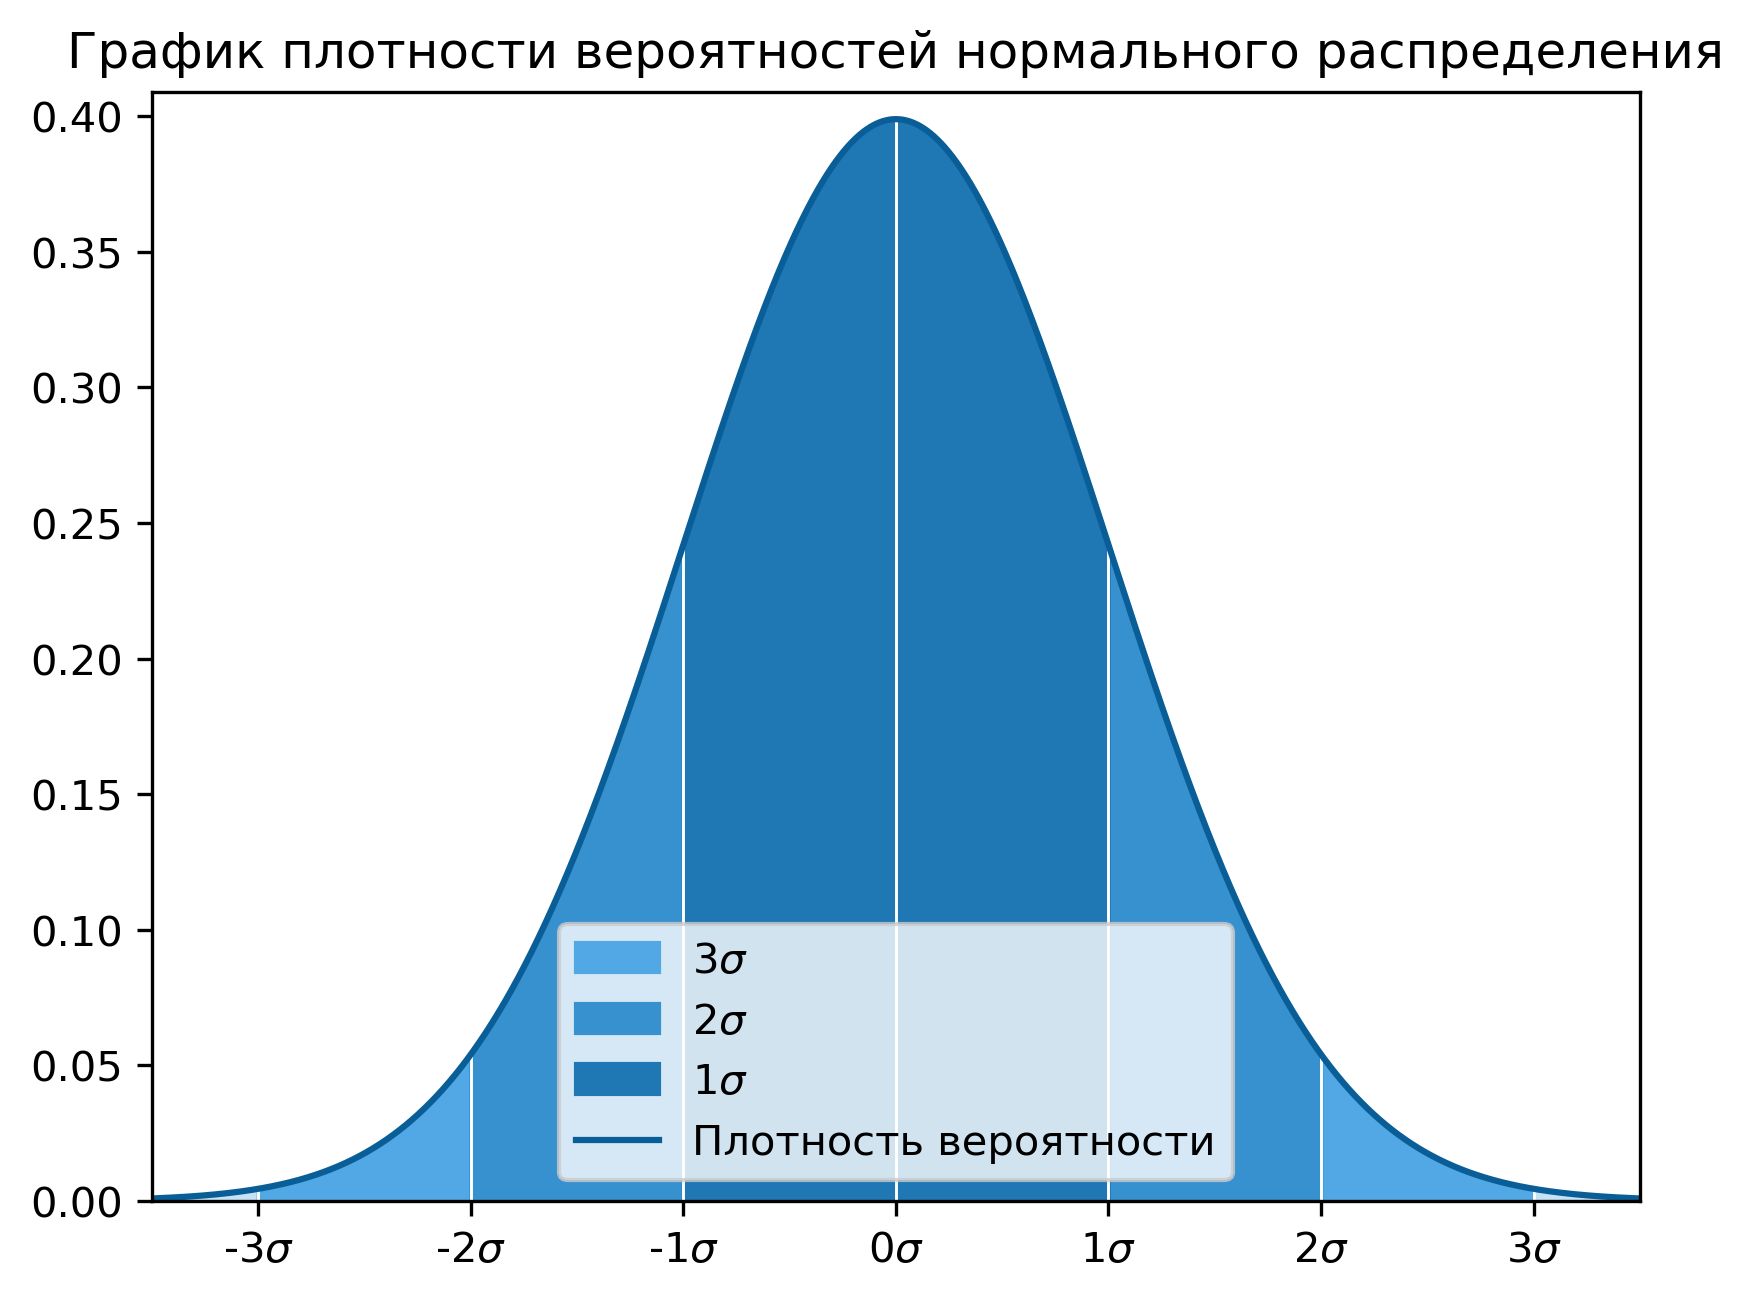

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(dpi=300)

x_axis = np.arange(-10, 10, 0.001)
y_axis = norm.pdf(x_axis, 0, 1)

plt.ylim(bottom=0, top=y_axis.max() + 0.01)
plt.xlim(-3.5, 3.5)

# Закрашиваем всю фигуру цветом
plt.fill_between(x_axis, y_axis, color='#c5e2f7')

# Закрашиваем все, что в пределях +-3 sd
sigm3_x = np.arange(-3, 3, 0.001)
sigm3_y = norm.pdf(sigm3_x, 0, 1)
sigm = plt.fill_between(sigm3_x, sigm3_y, color='#52a8e4')
sigm.set_label('3$\\sigma$')

# Закрашиваем все, что в пределах +-2 sd
sigm2_x = np.arange(-2, 2, 0.001)
sigm2_y = norm.pdf(sigm2_x, 0, 1)
sigm = plt.fill_between(sigm2_x, sigm2_y, color='#3891cf')
sigm.set_label('2$\\sigma$')

# Закрашиваем все, что в пределах +-1 sd
sigm1_x = np.arange(-1, 1, 0.001)
sigm1_y = norm.pdf(sigm1_x, 0, 1)
sigm = plt.fill_between(sigm1_x, sigm1_y, color='#1f77b4')
sigm.set_label('1$\\sigma$')

# Вертикальные линии-разграничители
sep_x = np.arange(-3, 4, 1)
sep_y = norm.pdf(sep_x, 0, 1)
plt.vlines(sep_x, 0, sep_y, colors='white', linewidths=0.7)

# Рисуем график нормального распределения
plot = plt.plot(x_axis, y_axis, label='Плотность вероятности', color='#0a5e98')

plt.xticks(
    ticks=[-3, -2, -1, 0, 1, 2, 3],
    labels=['-3$\\sigma$', '-2$\\sigma$', '-1$\\sigma$', '0$\\sigma$',
            '1$\\sigma$', '2$\\sigma$', '3$\\sigma$']
)

plt.title('График плотности вероятностей нормального распределения')

plt.legend()
plt.show()

#### Стандартизация данных

Стандартизация или z-преобразование - преобразование полученных данных в стандартную Z-шкалу с $M_Z = 0$ и $\sigma = 1$. Применяется для рассчетов по генеральной совокупности.
$$\large Z_i = \frac{x_i - \bar{X}}{\sigma_X} $$

При работе с выборками следует использовать t-преобразование:
$$\large T_i = \frac{x_i - \bar{X}}{sd_X} $$

### Центральная предельная теорема

Центральные предельные теоремы - это совокупность теорем в теории вероятностей, формулирующих общие закономерности поведения средних значений и сумм случайных величин.

Классическая центральная предельная теорема утверждают, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы, имеет распределение, близкое к нормальному.
$$\begin{gather}
\large S_n = \sum_{i = 1}^n X_i \rightarrow N(0, 1) \text{ по распределению при } n \rightarrow \infty \\
\large \text{Тогда} \\
\large \frac{S_n - \mu n}{\sigma\sqrt{n}} \rightarrow N(0, 1) \\
\large \text{Где } \mu \text{ - сумма или среднее значение случайных величин}
\end{gather}$$

Центральная предельная теорема в форме Леви утверждает то же, что и классическая, но по отношению к средним значениям, а не сумме.

Из этого мы можем сделать вывод, что при извлечении достаточно большого количества выборок из генеральной совокупности их средние зачения будут распределены нормально.

Извлечем из генеральной совокупности несколько выборок и посмотрим на их распределения:

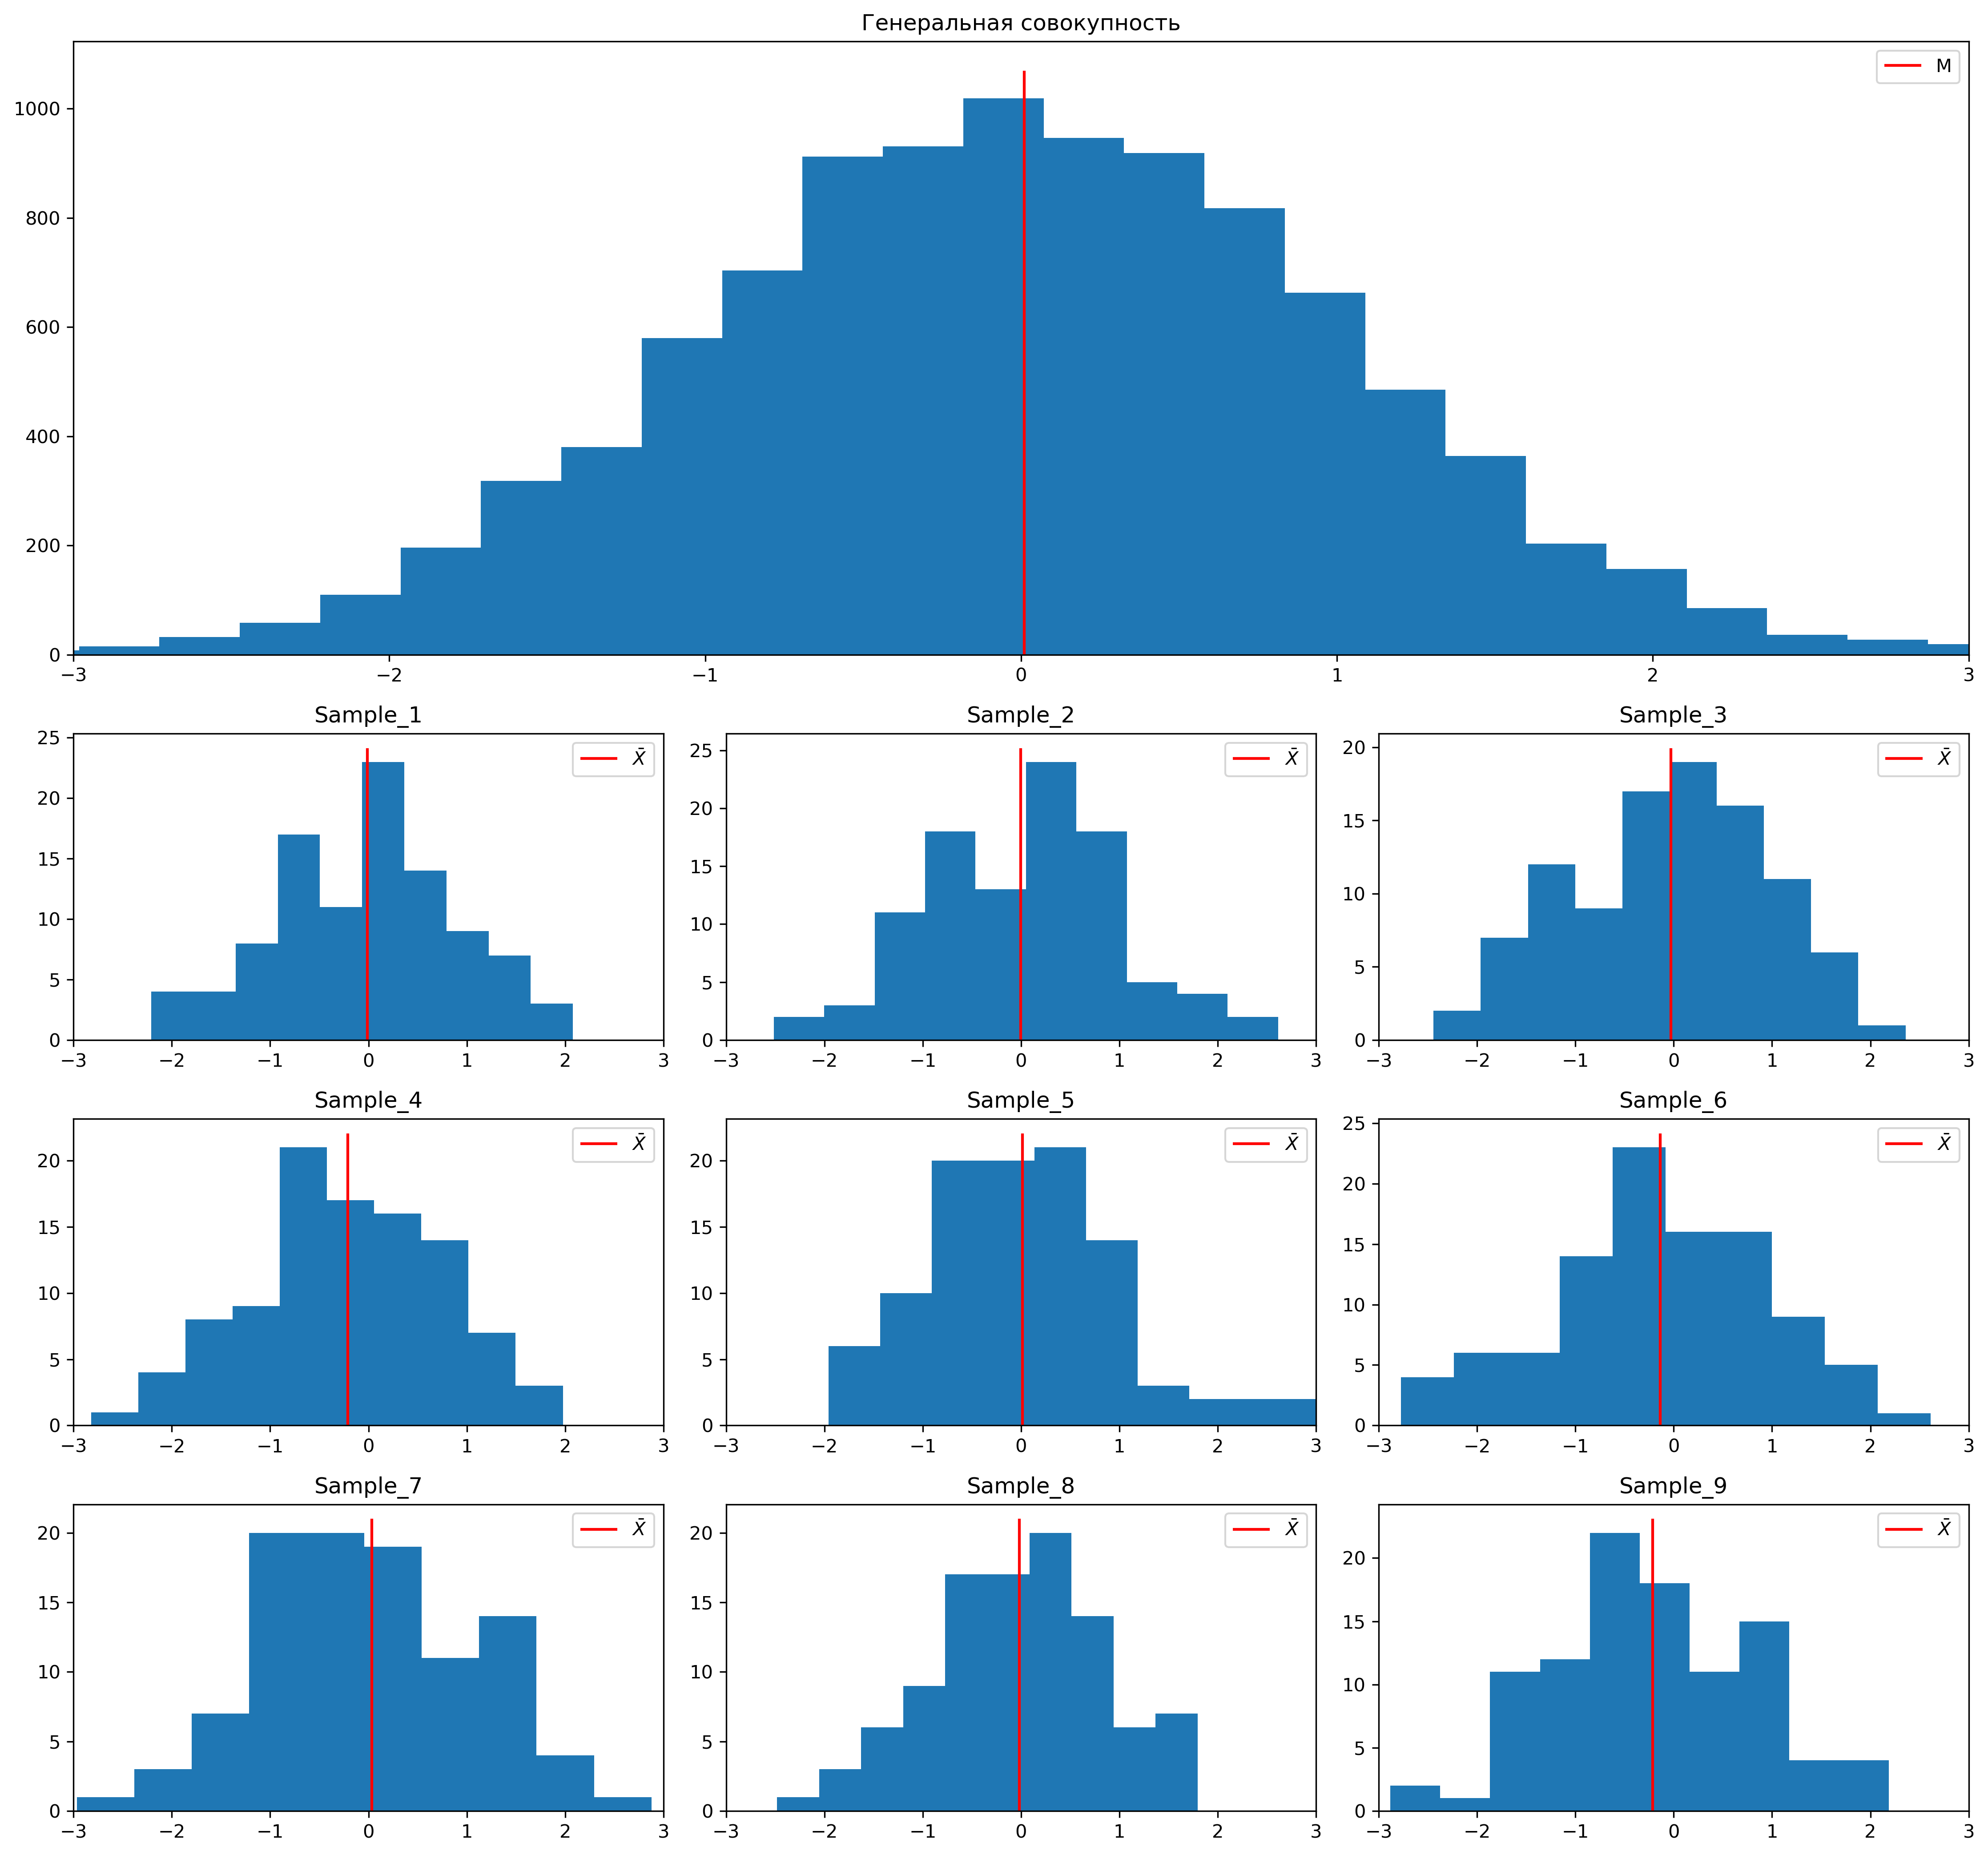

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplot_mosaic(
    [['Population', 'Population', 'Population'],
     ['Sample_1', 'Sample_2', 'Sample_3'],
     ['Sample_4', 'Sample_5', 'Sample_6'],
     ['Sample_7', 'Sample_8', 'Sample_9']],
    height_ratios=[2, 1, 1, 1],
    figsize=(15, 14),
    dpi=300,
    layout='tight'
)

# Создание и визуализация распределения в генеральной совокупности
population = np.random.normal(0, 1, 10000)

axs['Population'].set_xlim(left=-3, right=3)
axs['Population'].set_title('Генеральная совокупность')

axs['Population'].hist(population, bins=30)
axs['Population'].vlines(
    population.mean(),
    *axs['Population'].get_ylim(),
    colors='red',
    label='M'
)
axs['Population'].legend()

# Создание и визуализация распределения в выборках
for ax_name in [ 'Sample' + f'_{num}' for num in range(1, 10) ]:
    sample = np.random.choice(population, 100, replace=False)
    
    axs[ax_name].set_xlim(left=-3, right=3)
    axs[ax_name].hist(sample)
    
    axs[ax_name].vlines(
        np.mean(sample),
        *axs[ax_name].get_ylim(),
        colors='red',
        label='$\\bar{X}$'
    )
    
    axs[ax_name].set_title(ax_name)
    axs[ax_name].legend()

plt.show()

Средние по выборкам имеют незначительные отклонения от среднего генеральной совокупности и отчасти повторяют форму распределения.

Посмотрим распределение средних значений большого количества выборок, извлеченных из этой генеральной совокупности:

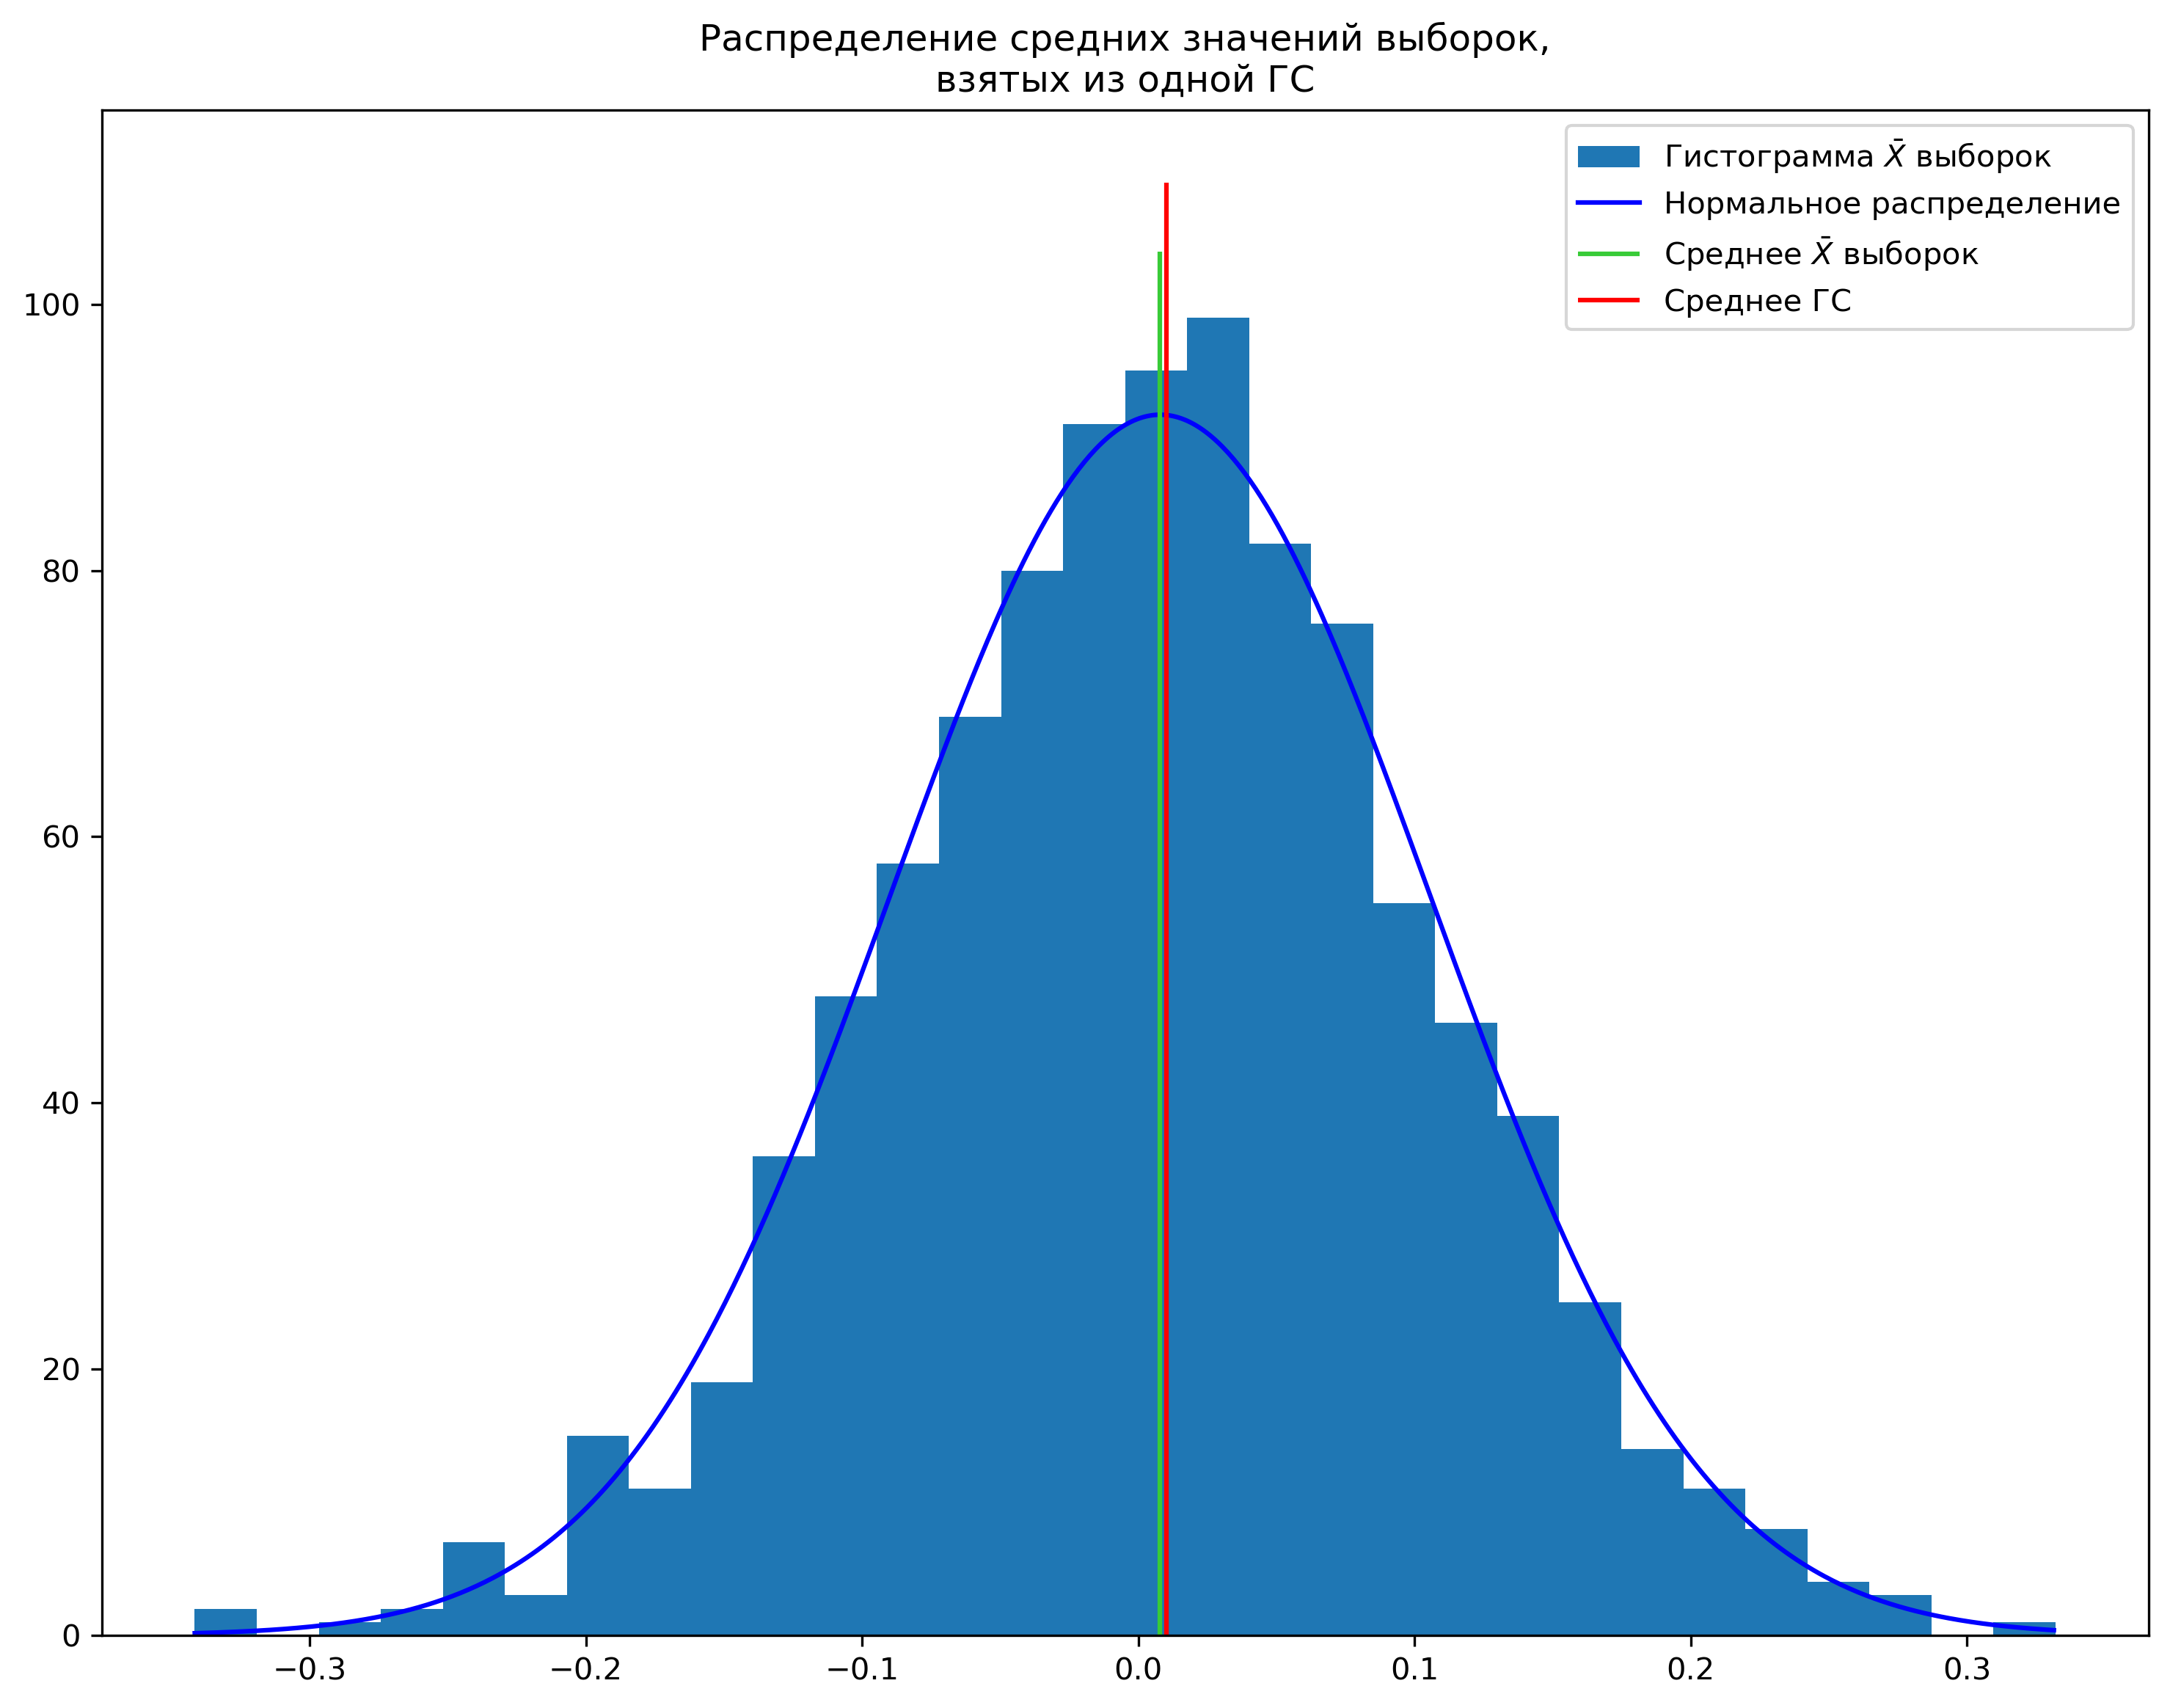

In [9]:
from scipy.stats import norm

# Извлечение 1000 выборок по 100 объектов и нахождение их средних значений
sample_mean_dist = np.array(
    [ np.mean(sample) for sample in [ np.random.choice(population, 100, replace=False) for _ in range(1000) ] ]
)

plt.figure(figsize=(12, 9), dpi=300)

# Визуализация распределения средних значений выборок
counts, bins, _ = plt.hist(sample_mean_dist, bins=30, label='Гистограмма $\\bar{X}$ выборок')

# Создание графика нормального распределение и масштабирование его под наше распределение
normal_dist_x = np.arange(sample_mean_dist.min(), sample_mean_dist.max(), 0.001)
normal_dist_y = norm.pdf(normal_dist_x, sample_mean_dist.mean(), sample_mean_dist.std(ddof=1))
normal_dist_y = normal_dist_y * sample_mean_dist.shape[0] * (bins[1] - bins[0])

plt.plot(normal_dist_x, normal_dist_y, c='blue', label='Нормальное распределение')

# Визуализация средних значений распределений
plt.vlines(sample_mean_dist.mean(), *plt.ylim(), colors='#38cb37', label='Среднее $\\bar{X}$ выборок')
plt.vlines(population.mean(), *plt.ylim(), colors='red', label='Среднее ГС')

plt.title('Распределение средних значений выборок,\nвзятых из одной ГС')
plt.legend()
plt.show()

Мы видим, что средневыборочные значения имеют распределение, близкое к нормальному вокруг среднего генеральной совокупности со стандартным отклонением, равным стандартной ошибке среднего (рассмотрена в теме доверительных интервалов)

#### Замечание о ЦПТ №1

Признак может быть распределен как угодно. Независимо от распределения признака распределение средневыборочных значений будет стремиться к нормальному.

Проверим это замечание на практике:

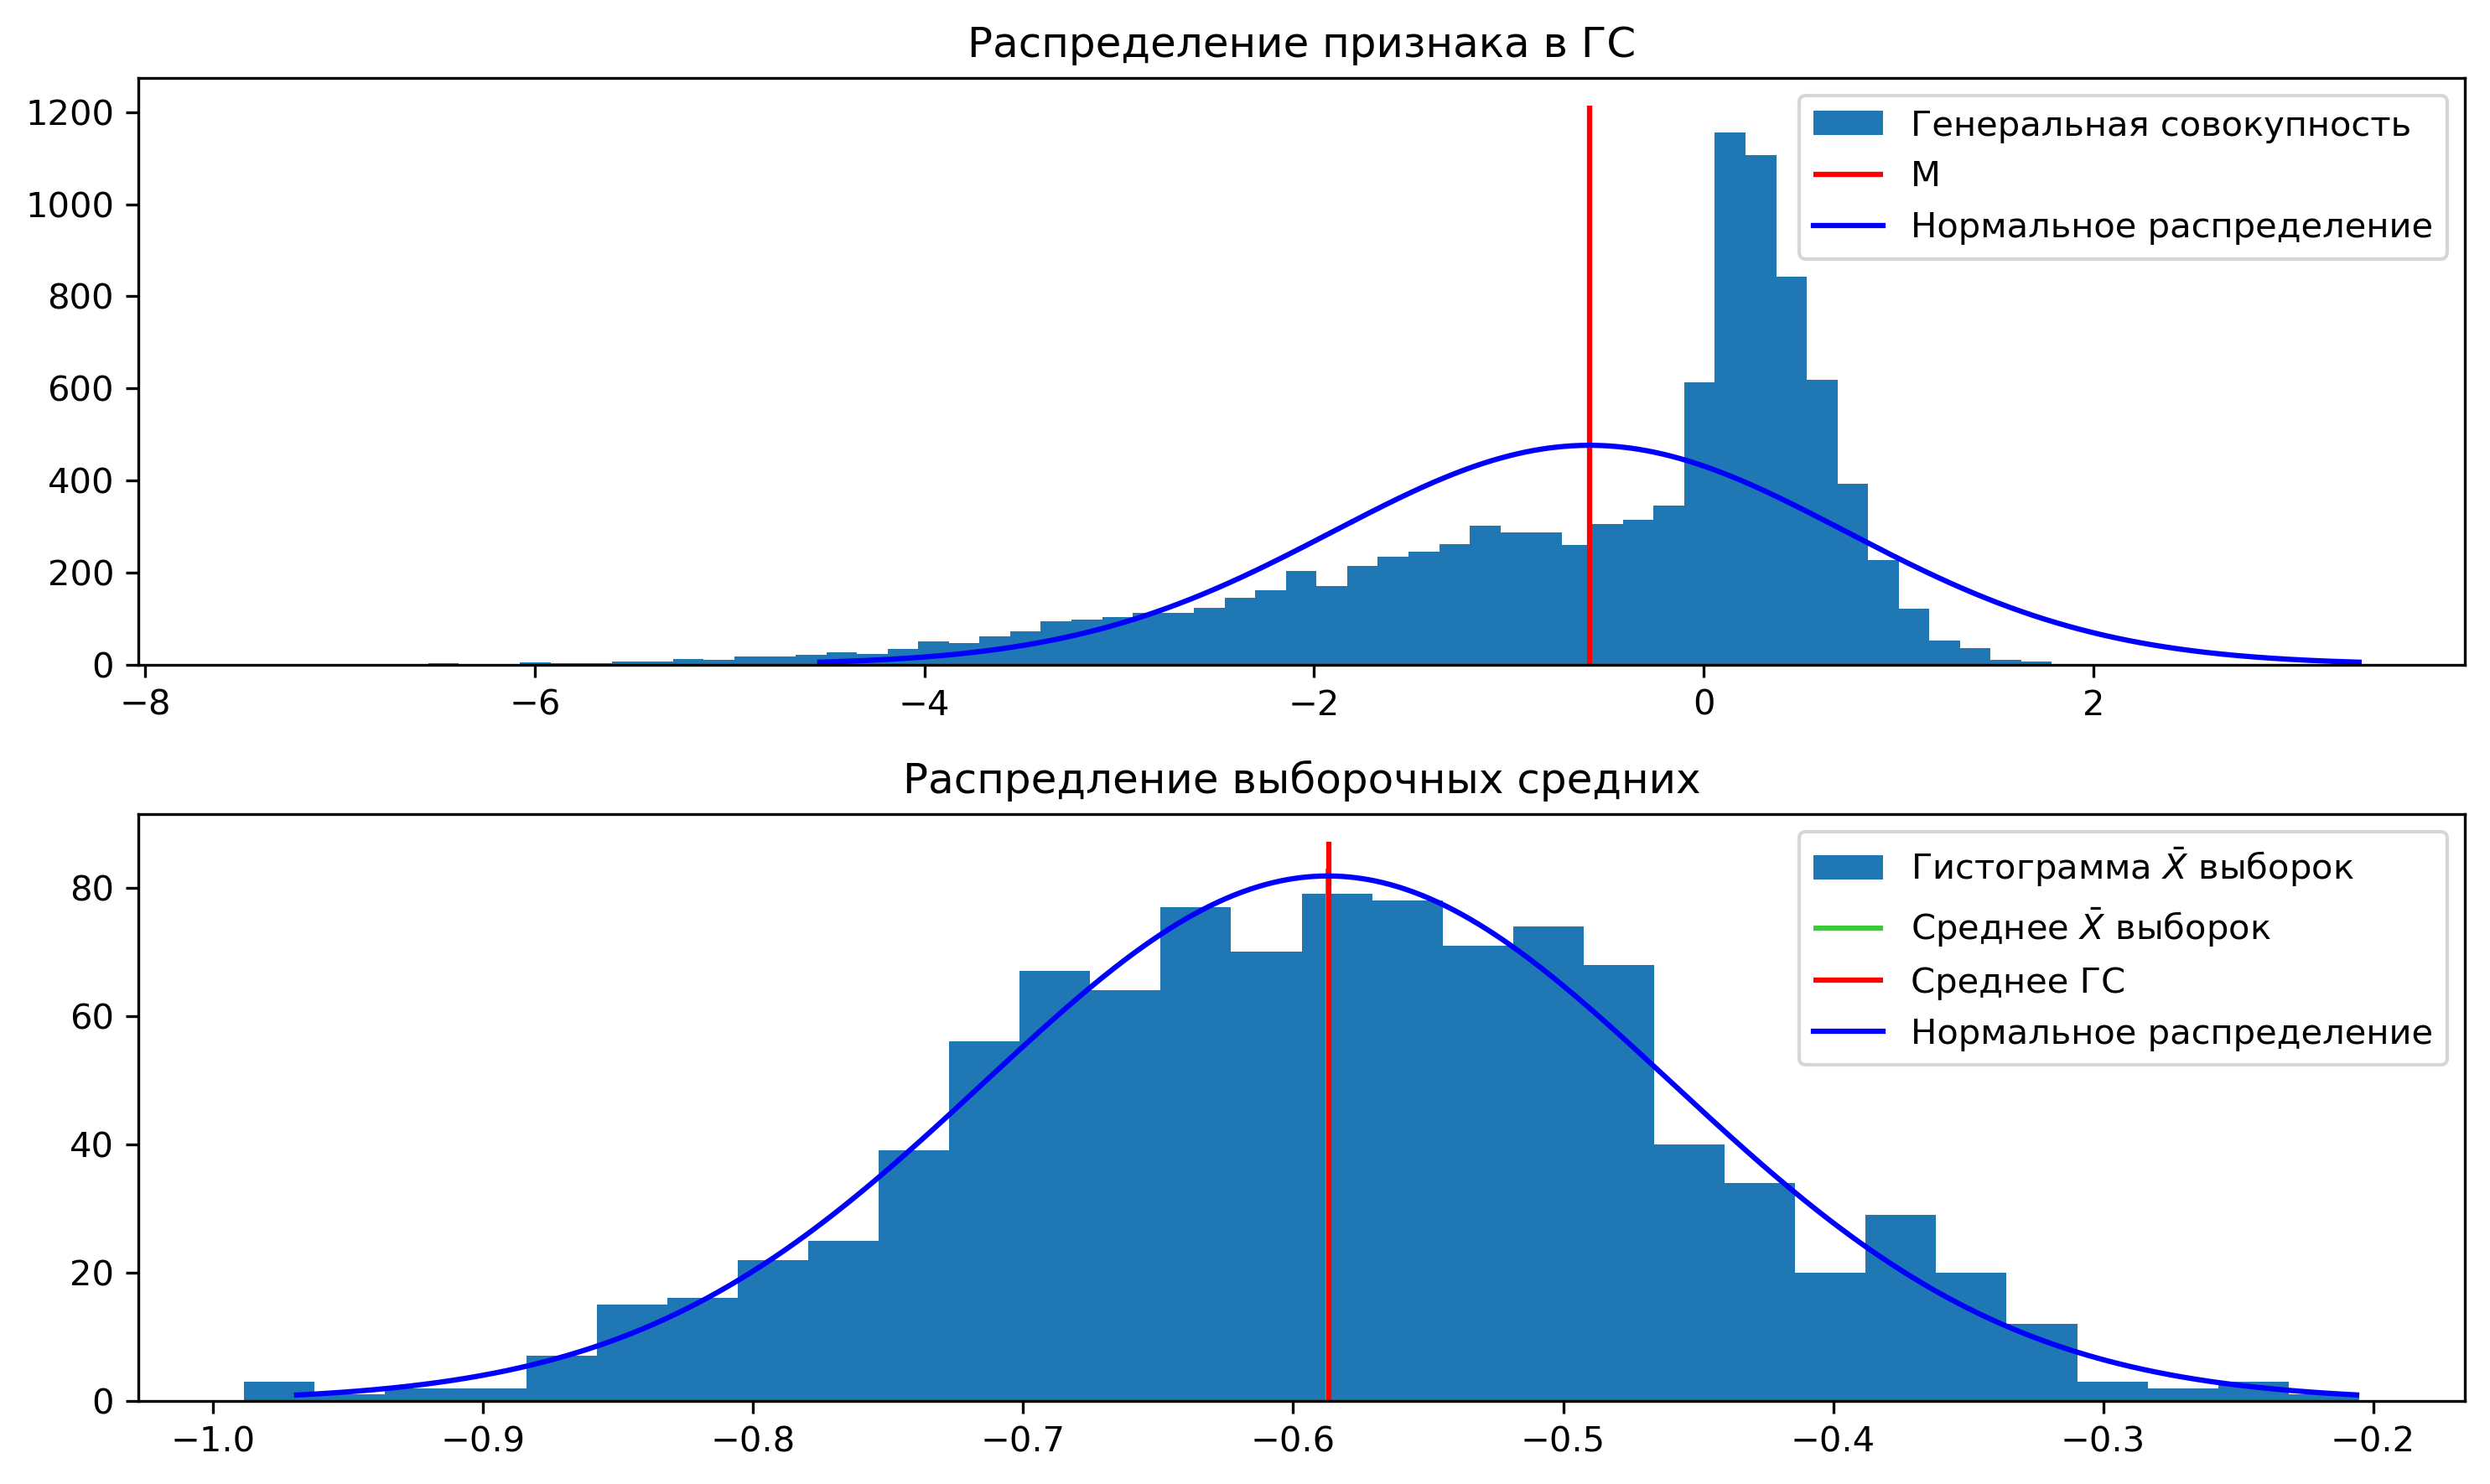

In [11]:
from math import log, fabs

# Изменение распределения в популяции
dist_func = np.vectorize(lambda value: value * 2 if value < 0 else value / 2)
new_population = dist_func(population)

fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 6),
    dpi=300,
    layout='tight'
)

# Визуализация смещенного распределения и его среднего
counts, bins, _ = ax1.hist(new_population, bins=60, label='Генеральная совокупность')
population_mean = np.mean(new_population)
population_std = np.std(new_population)
ax1.vlines(population_mean, *ax1.get_ylim(), colors='red', label='M')

# 
norm_x = np.arange(
    population_mean - population_std * 3,
    population_mean + population_std * 3,
    0.001
)
norm_y = norm.pdf(norm_x, population_mean, population_std)
norm_y = norm_y * new_population.shape[0] * (bins[1] - bins[0])
ax1.plot(
    norm_x,
    norm_y,
    c='blue',
    label='Нормальное распределение'
)
ax1.legend()
ax1.set_title('Распределение признака в ГС')

sample_mean_dist = np.array(
    [ np.mean(sample) for sample in [ np.random.choice(new_population, 100, replace=False) for _ in range(1000) ] ]
)

counts, bins, _ = ax2.hist(sample_mean_dist, bins=30, label='Гистограмма $\\bar{X}$ выборок')

samples_mean = np.mean(sample_mean_dist)
samples_std = np.std(sample_mean_dist, ddof=1)
ax2.vlines(samples_mean, *ax2.get_ylim(), colors='#38cb37', label='Среднее $\\bar{X}$ выборок')
ax2.vlines(population_mean, *ax2.get_ylim(), colors='red', label='Среднее ГС')

norm_x = np.arange(samples_mean - samples_std * 3, samples_mean + samples_std * 3, 0.001)
norm_y = norm.pdf(norm_x, samples_mean, samples_std)
norm_y = norm_y * sample_mean_dist.shape[0] * (bins[1] - bins[0])
ax2.plot(
    norm_x,
    norm_y,
    c='blue',
    label='Нормальное распределение'
)
ax2.legend()
ax2.set_title('Распредление выборочных средних')

plt.show()

### Доверительные интервалы

Доверительный интервал - это такой интервал, который покрывает неизвестный параметр неизвестный параметр с заданной точностью. Используется при интервальной оценке.

Интервальная оценка доверительным интервалом основывается на том, что выборочные средние распределились бы нормальным образом вокруг среднего гнеральной совокупности с отклонением, равным стандартной ошибке среднего ($se$):
$$\large se = \frac{sd_X}{\sqrt{n}} $$  
Тогда 95% наблюдений лежали бы в диапазоне $\bar{X} \pm 1.96 * se$. Для 99% доверительного интервала используется коэффициент 2.58.

Возьмем выборку из ГС в прошлом параграфе и построим для ее среднего доверительный интервал:

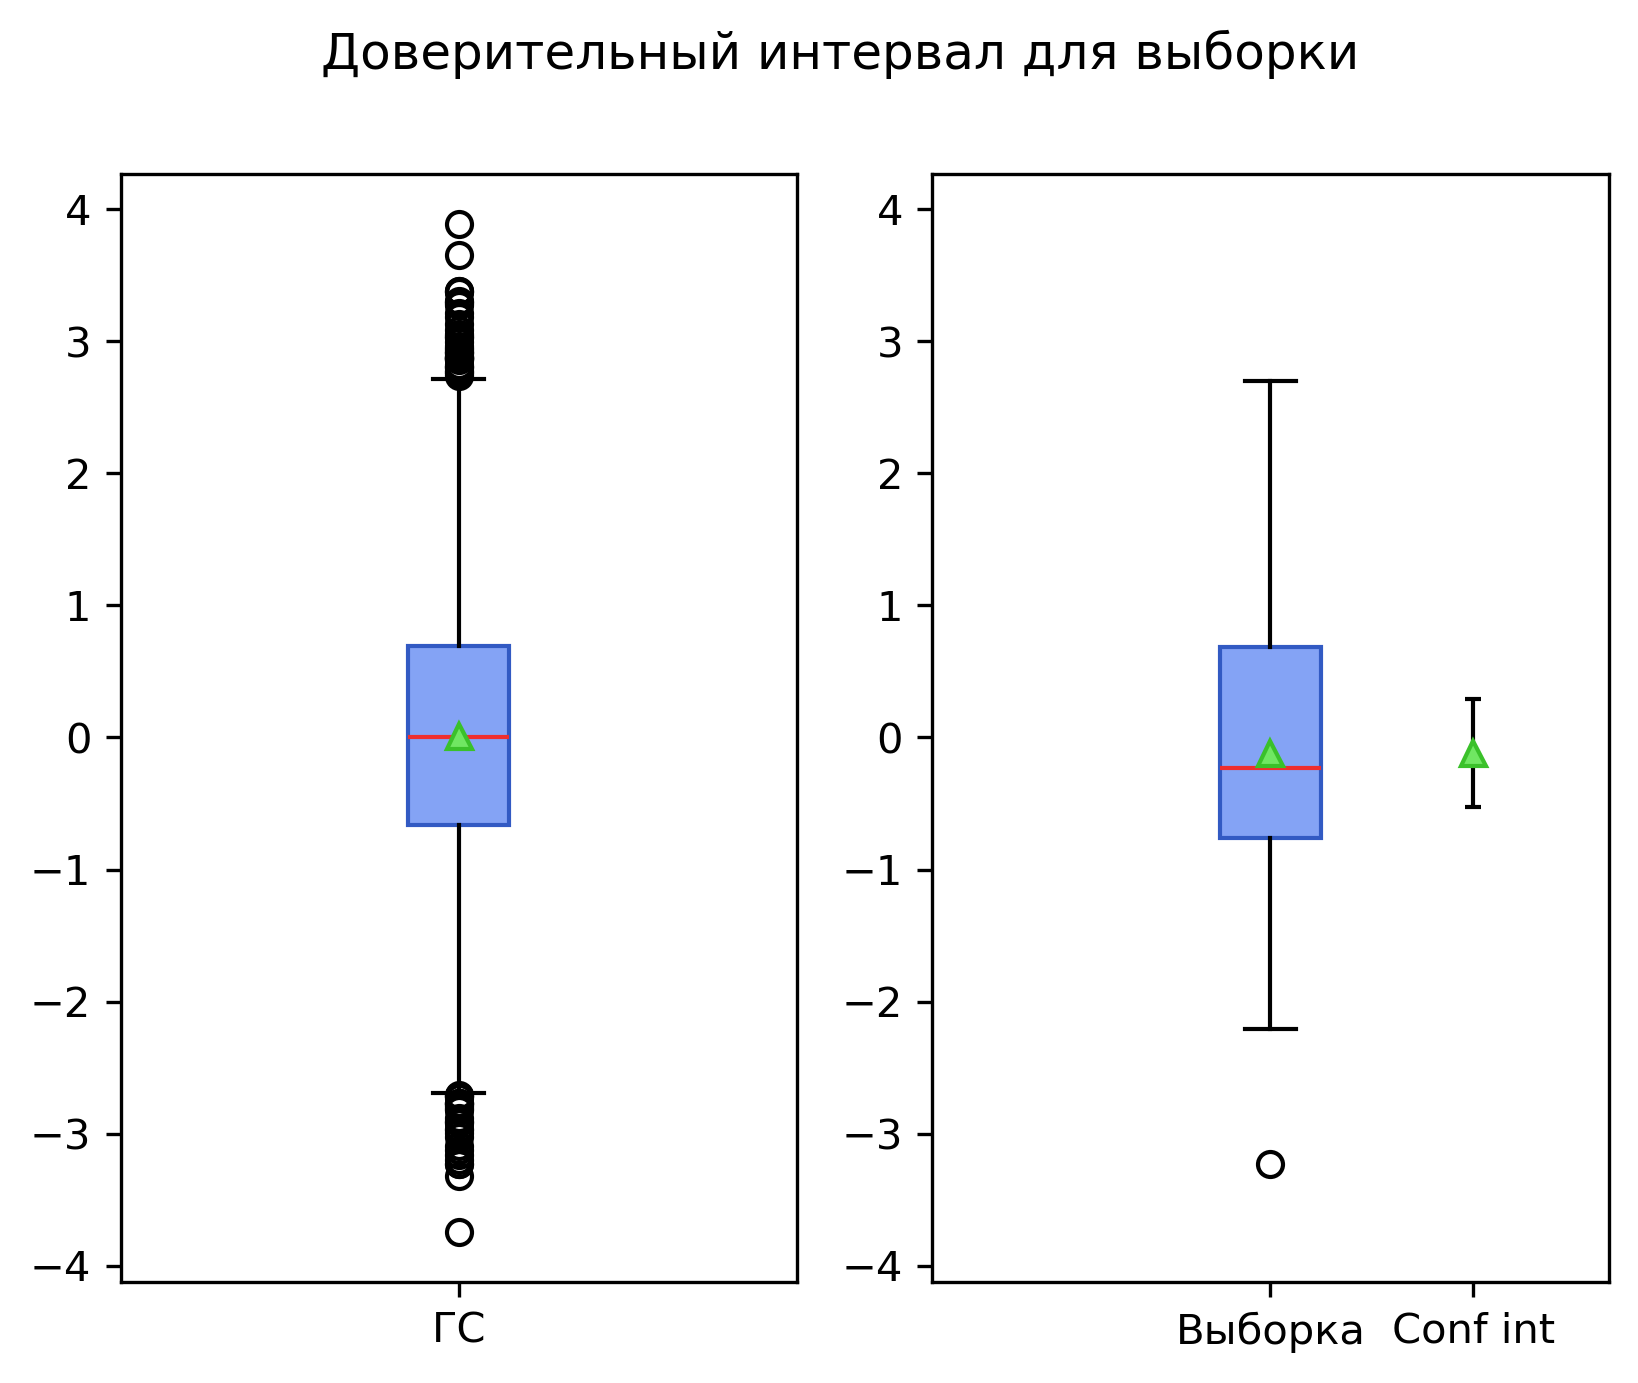

Среднее генеральной совокупности с 95% вероятностью находится в промежутке [-0.33; 0.09]


In [13]:
import scipy.stats as stats

sample = np.random.choice(population, 100, replace=False)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=300)
fig.suptitle('Доверительный интервал для выборки')
ax1.sharey(ax2)

# Визуализация ГС
ax1.boxplot(
    population,
    patch_artist=True,
    showmeans=True,
    boxprops={'facecolor': '#84a3f5',
              'color': '#325ac3'},
    meanprops={'markerfacecolor': '#70e762',
               'markeredgecolor': '#3ac12a'},
    medianprops={'color': '#ef2e2e'},
    tick_labels=['ГС']
)

# Визуализация выборки
ax2.boxplot(
    sample,
    patch_artist=True,
    showmeans=True,
    boxprops={'facecolor': '#84a3f5',
              'color': '#325ac3'},
    meanprops={'markerfacecolor': '#70e762',
               'markeredgecolor': '#3ac12a'},
    medianprops={'color': '#ef2e2e'}
)

# Построение доверительного интервала
confidence=0.95
n = sample.shape[0]
mean = np.mean(sample)
std = np.std(sample, ddof=1)

ci = stats.t.interval(confidence, df=n - 1, loc=mean, scale=std / np.sqrt(n))

# Визуализация доверительного интервала
conf_interval = ax2.errorbar(
    1.3,
    mean,
    yerr=ci[1] - ci[0],
    fmt='^',
    ecolor='black',
    elinewidth=1,
    capsize=2
)

plt.setp(conf_interval[0], markerfacecolor='#70e762', markeredgecolor='#3ac12a')

ax2.set_xticks(
    [1, 1.3],
    labels=['Выборка', 'Conf int']
)

plt.show()

print(f'Среднее генеральной совокупности с 95% вероятностью находится в промежутке [{ci[0]:.2f}; {ci[1]:.2f}]')

### Идея статистического вывода

Статистический вывод - обобщение информации из выборки для получения представления о свойствах генеральной совокупности.

Статистические гипотезы:
- Нулевая гипотеза ($H_0$): основная гипотеза, которой следует придерживаться до ее опровержения.
- Альтернативная гипотеза ($H_1$): гипотеза, которая принимается в случае опровержения $H_0$

Уровень значимости - вероятность случайного возникновения полученных величин (возникновения полученных результатов при верности $H_0$). Как правило критическим значением для p-уровня значимости считается < 0.05.

Ошибки статистического вывода:
- Ошибка первого рода (ложноположительное заключение): отвержение верной $H_0$
- Ошибка второго рода (ложноотрицательное заключение): принятие неверной $H_0$

Пример статистического вывода на основании сравнения средних значений:

In [41]:
import numpy as np
import scipy.stats as stats
from math import sqrt, log10, floor, ceil

def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

# Исходные данные
M = 20 # Среднее ГС
n = 64 # Объем выборки
mean = 18.5 # Среднее выборки
sd = 4 # Стандартное отклонение выборки

# Рассчет стандатной ошибки среднего и перевод в t-шкалу
se = 4 / sqrt(n - 1)
t_scale = (mean - M) / se

# Рассчет уровня значимости по t-распределению
# Умножаем на 2, так как берем отклонения в обе стороны
if t_scale >= 0:
    p = stats.t.sf(t_scale, df=n - 1) * 2
else:
    p = stats.t.cdf(t_scale, df=n - 1) * 2

print(f'Принимаем {'H0' if p >= 0.05 else 'H1'} в связи с p \u2248 {round_to_1(p)}')

Принимаем H1 в связи с p ≈ 0.004


## Сравнение средних

### T-распределение

T-распределение (распределение Стьюдента) - распределение, описывающее статистическое поведение отдельных типов отношений случайных величин. По равнению с нормальным распределением, у него более "тяжелые" хвосты, а распределение зависит от числа наблюдений.  
T-распределение применяется в ситуации, когда число наблюдений невелико и $\sigma$ неизвестно.  
Форма распределения зависит от числа степеней свободы ($df$). С увеличением числа степеней свободы t-распределение стремится к нормальному.

T-распределение описывает поведение совокупности выборочных средних.

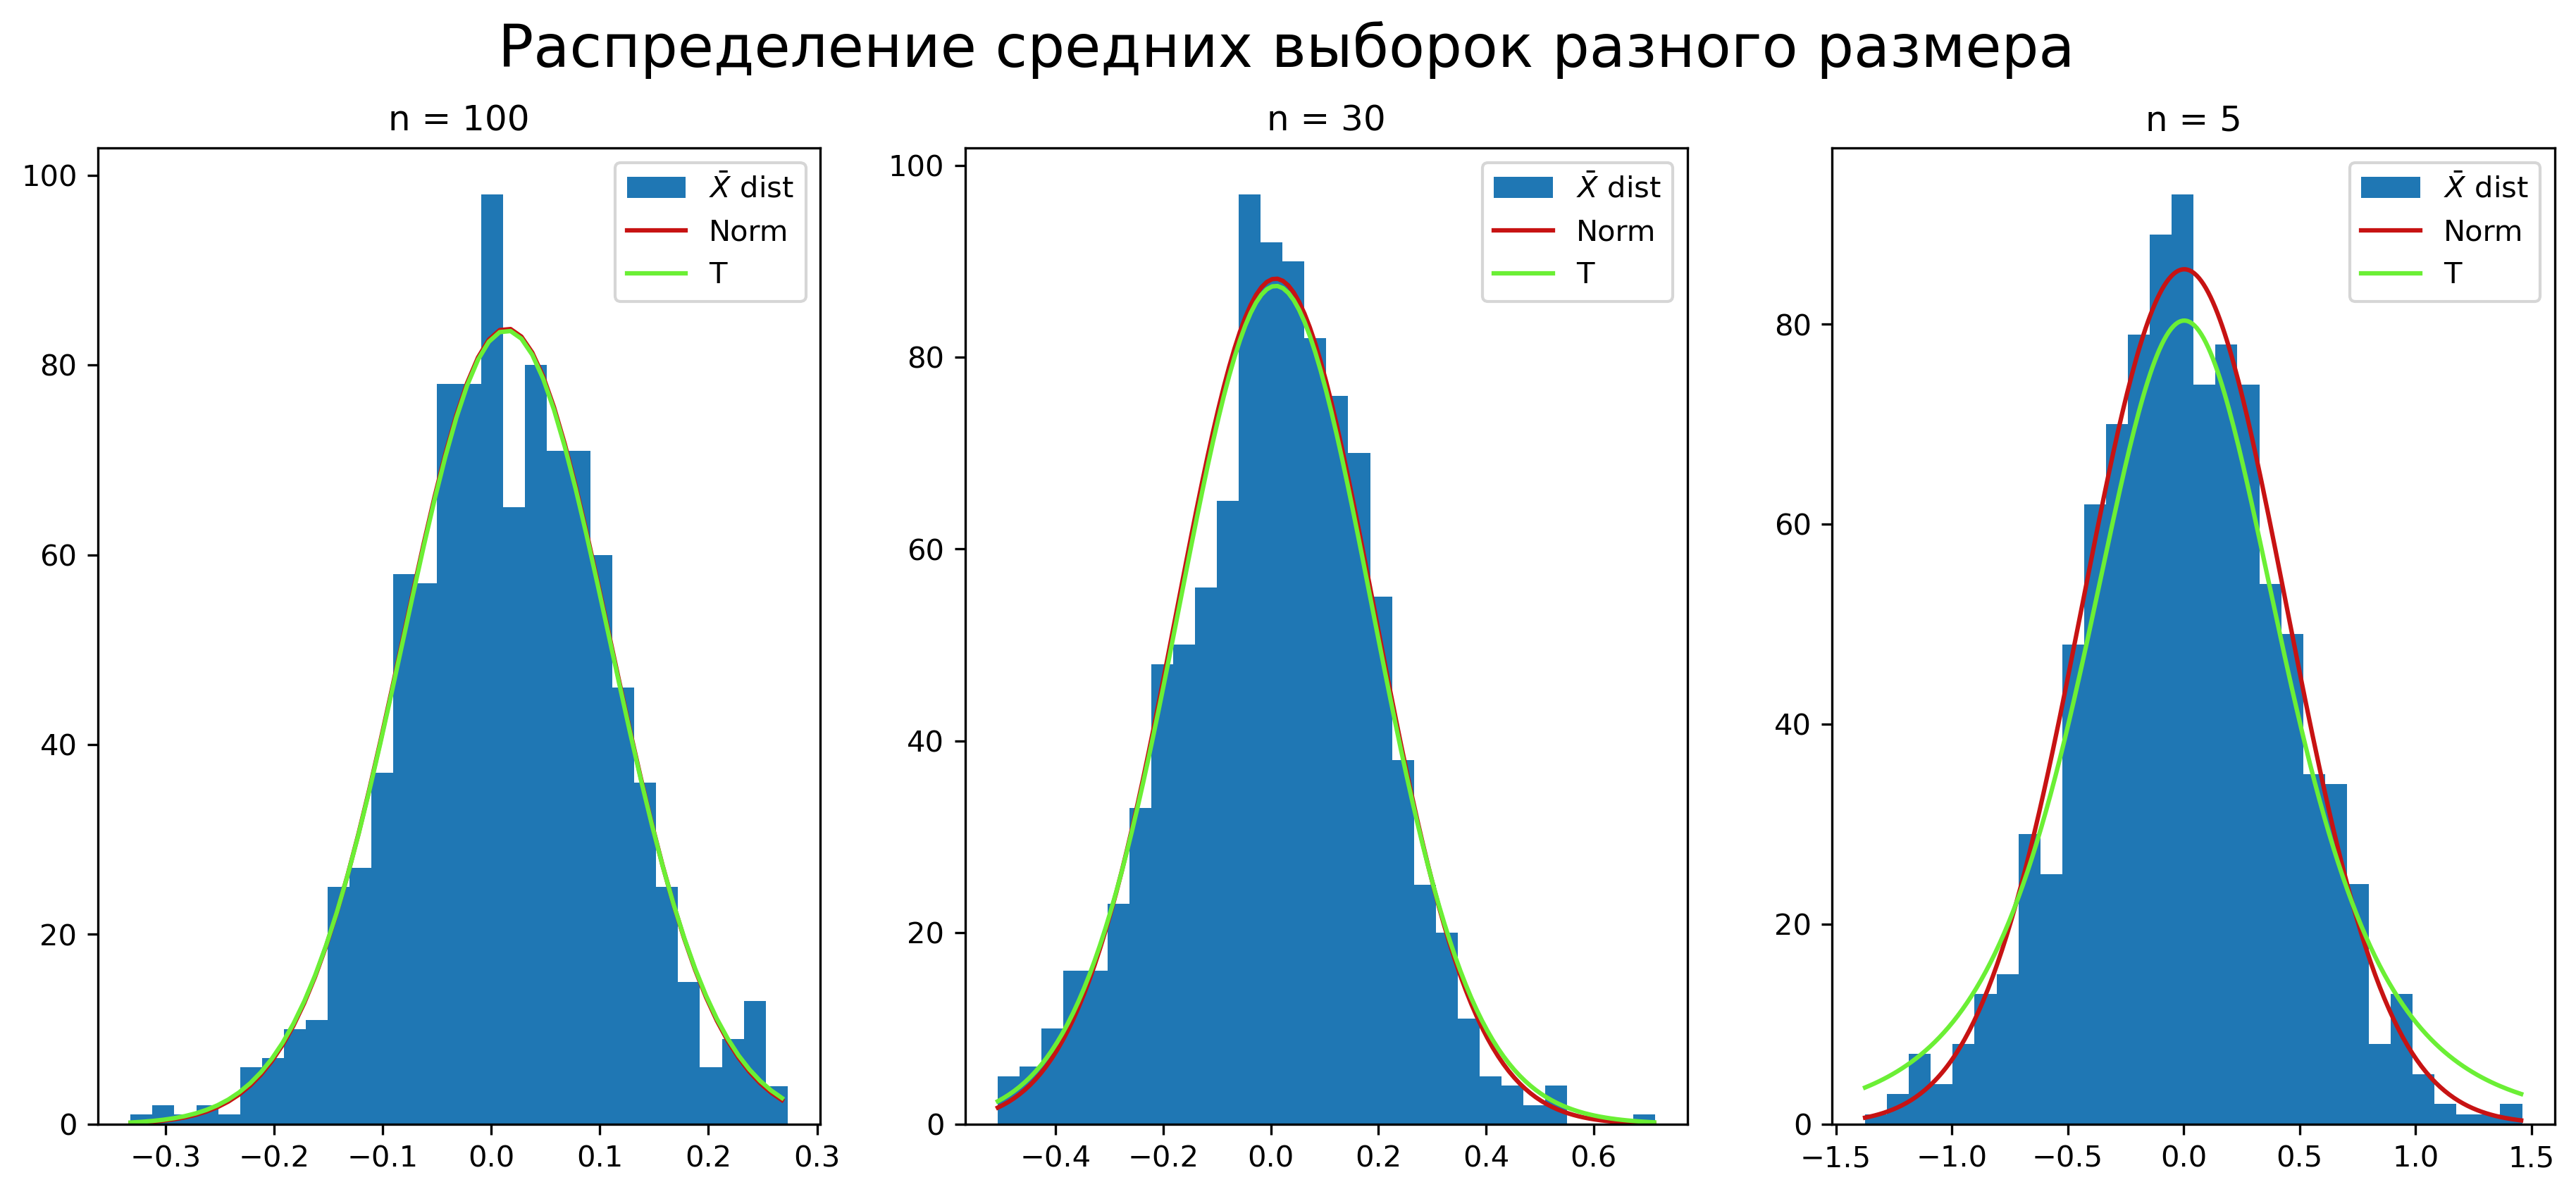

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Генерация выборок с n числом испытуемых
def generate_sample(n):
    return np.array([ sample.mean() for sample in [ np.random.choice(population, n, replace=False) for _ in range(1000) ]])

# Генерация ГС
population = np.random.normal(0, 1, 10000)

# Настройка визуализации
fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3,
    nrows=1,
    dpi=300,
    figsize=(15, 6)
)

fig.suptitle('Распределение средних выборок разного размера', fontsize=20)

# Гистограмма для выборок с n испытуемыми
def plot_samples(n, ax):
    samples_means = generate_sample(n)

    # Гистограмма
    counts, bins, _ = ax.hist(samples_means, bins=30, label='$\\bar{X}$ dist')
    
    x = np.arange(samples_means.min(), samples_means.max(), 0.01)

    # График нормального распределения
    y_norm = stats.norm.pdf(x, samples_means.mean(), samples_means.std())
    y_norm = y_norm * samples_means.shape[0] * (bins[1] - bins[0])

    # График t-распределения
    y_t = stats.t.pdf(x, n - 1, samples_means.mean(), samples_means.std())
    y_t = y_t * samples_means.shape[0] * (bins[1] - bins[0])

    ax.plot(x, y_norm, label='Norm', c='#c71313')
    ax.plot(x, y_t, label='T', c='#6bef35')

    ax.legend()
    ax.set_title(f'n = {n}')

# Визуализация распределение с n = 100/30/5
plot_samples(100, ax1)
plot_samples(30, ax2)
plot_samples(5, ax3)
    
plt.show()

### Сравнение двух средних. T-критерий Стьюдента

T-критерий Стьюдента или парный t-тест - метод статистической проверки гипотез, основанный на проверке равенства средних двух выборок.  
Если бы мы много раз извлекали из ГС по паре выборок, то, согласно ЦПТ, величины $\bar{X}_1 - \bar{X}_2$ распределились бы по t-распределению с $n_1 + n_2 - 2$ числом степеней свободы, средним $0$ и стандартной ошибкой среднего равной:
$$\large se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}$$

Основываясь на этом, мы можем рассчитать вероятность получить значение величины $\bar{X}_1 - \bar{X}_2$ такое же или более выраженное, чем у конкретной пары выборок при допущении, что верна $H_0$.

Формула t-критерия Стьюдента:
$$\large  t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}}$$
$$\large df = n_1 + n_2 - 2$$

Ограничения t-критерия:
- Требование гомогенности дисперсий (проверка критериями Левина или Фишера).
- При $n < 30$ требуется нормальность распределения выборок, так как возможны нежелательные эффекты.

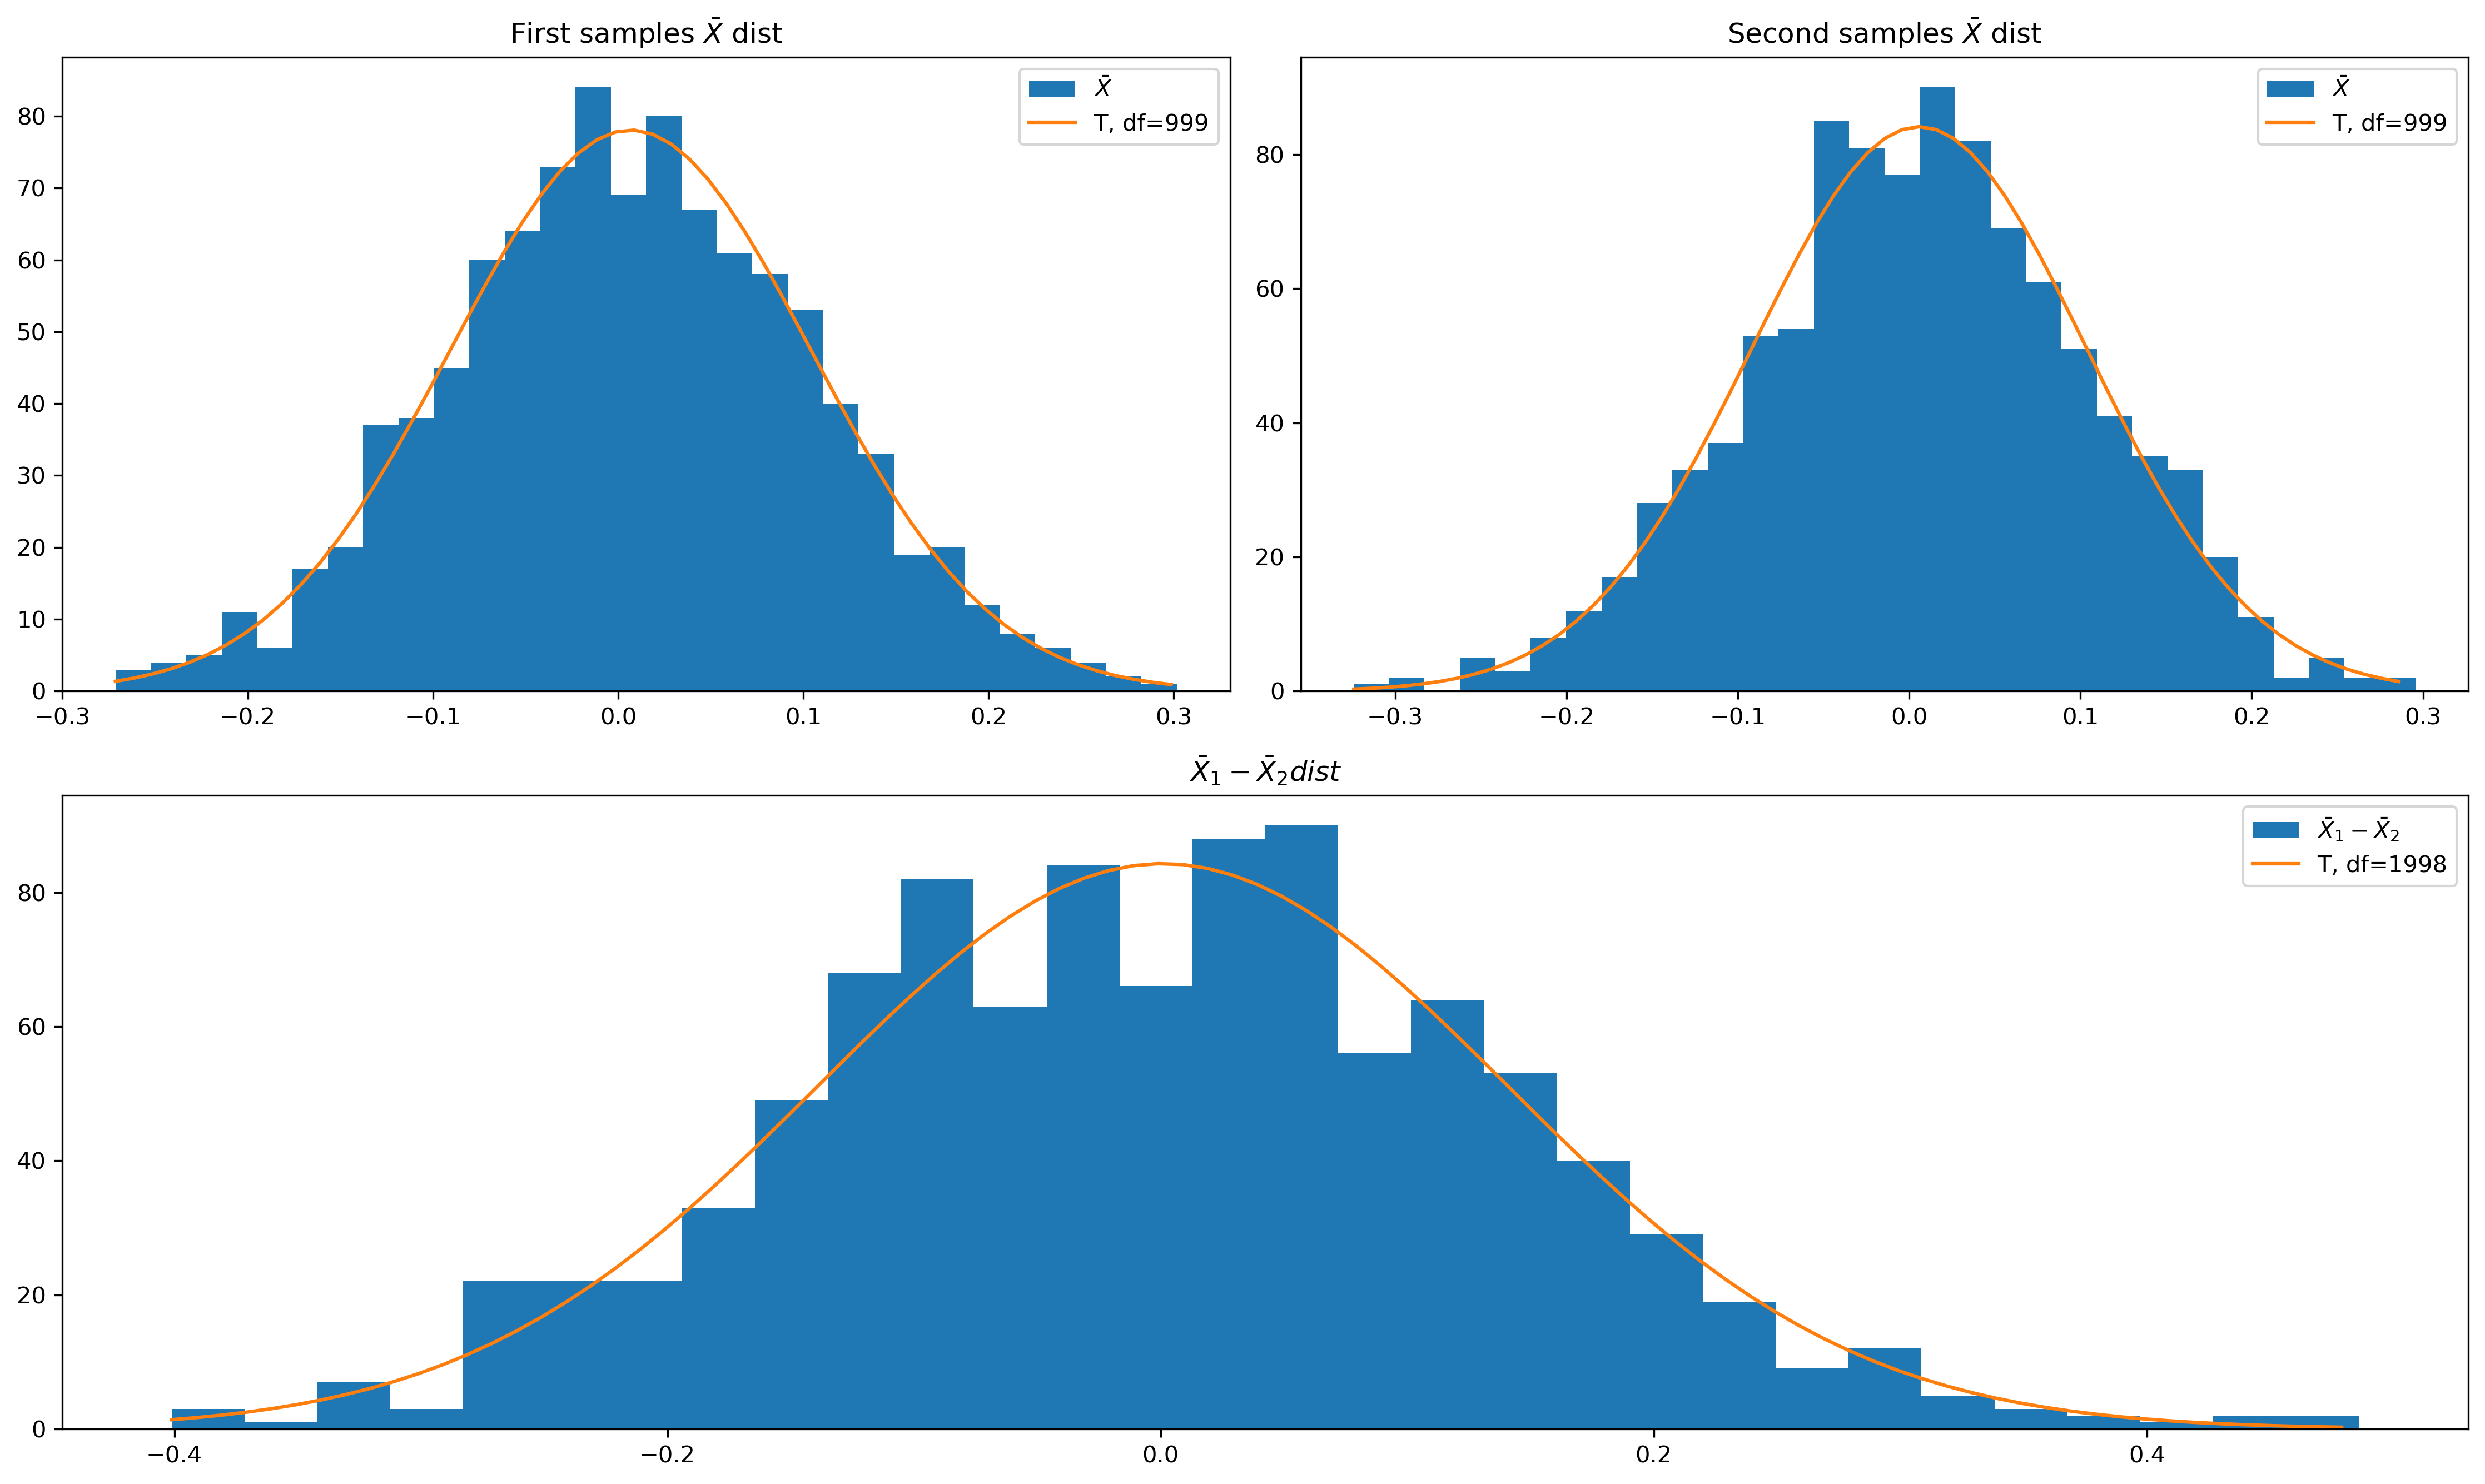

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axs = plt.subplot_mosaic(
    [['Sample_1', 'Sample_2'],
     ['Means_diffs', 'Means_diffs']],
    figsize=(15, 9),
    dpi=300,
    layout='tight'
)

# Генерация ГС
population = np.random.normal(0, 1, 10000)

samples_1 = np.array(
    [ sample.mean() for sample in 
        [ np.random.choice(population, 100, replace=False) for _ in range(1000) ]
    ]
)

samples_2 = np.array(
    [ sample.mean() for sample in 
        [ np.random.choice(population, 100, replace=False) for _ in range(1000) ]
    ]
)

means_diffs = samples_1 - samples_2

def plot_dist(data, df, ax, title, label):
    counts, bins, _ = ax.hist(data, bins=30, label=label)

    x = np.arange(data.min(), data.max(), 0.01)

    y_t = stats.t.pdf(x, df, data.mean(), data.std())
    y_t = y_t * data.shape[0] * (bins[1] - bins[0])

    ax.plot(x, y_t, label=f'T, df={df}')
    ax.set_title(title)
    ax.legend()

plot_dist(
    samples_1,
    samples_1.shape[0] - 1,
    axs['Sample_1'],
    'First samples $\\bar{X}$ dist',
    '$\\bar{X}$'
)

plot_dist(
    samples_2,
    samples_2.shape[0] - 1,
    axs['Sample_2'],
    'Second samples $\\bar{X}$ dist',
    '$\\bar{X}$'
)

plot_dist(
    means_diffs,
    samples_1.shape[0] + samples_2.shape[0] - 2,
    axs['Means_diffs'],
    '$\\bar{X}_1 - \\bar{X}_2 dist$',
    '$\\bar{X}_1 - \\bar{X}_2$'
)

In [18]:
import pandas as pd
import scipy.stats as stats
from math import floor, log10

# Округление для уровня значимости
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

data = pd.DataFrame(
    {'mean': [89.9, 80.7],
     'std': [11.3, 11.7],
     'n': [20, 20]},
    index=['Species 1', 'Species 2']
)

sp_1 = data.loc['Species 1']
sp_2 = data.loc['Species 2']

ttest_result, p = stats.ttest_ind_from_stats(
    sp_1['mean'], sp_1['std'], sp_1['n'],
    sp_2['mean'], sp_2['std'], sp_2['n']
)

print(f'Принимает {'H0' if p >= 0.05 else 'H1'} в связи с p \u2248 {round_to_1(p)}')

Принимает H1 в связи с p ≈ 0.02


### Проверка распределения на нормальность. QQ-plot

#### QQ-plot

QQ-plot (Quantile-Quantile plot) - способ визуального представления данных, в котором по оси X откладываются квантили теоретического распределения (например, нормального), а по оси Y - квантили реального распределения.

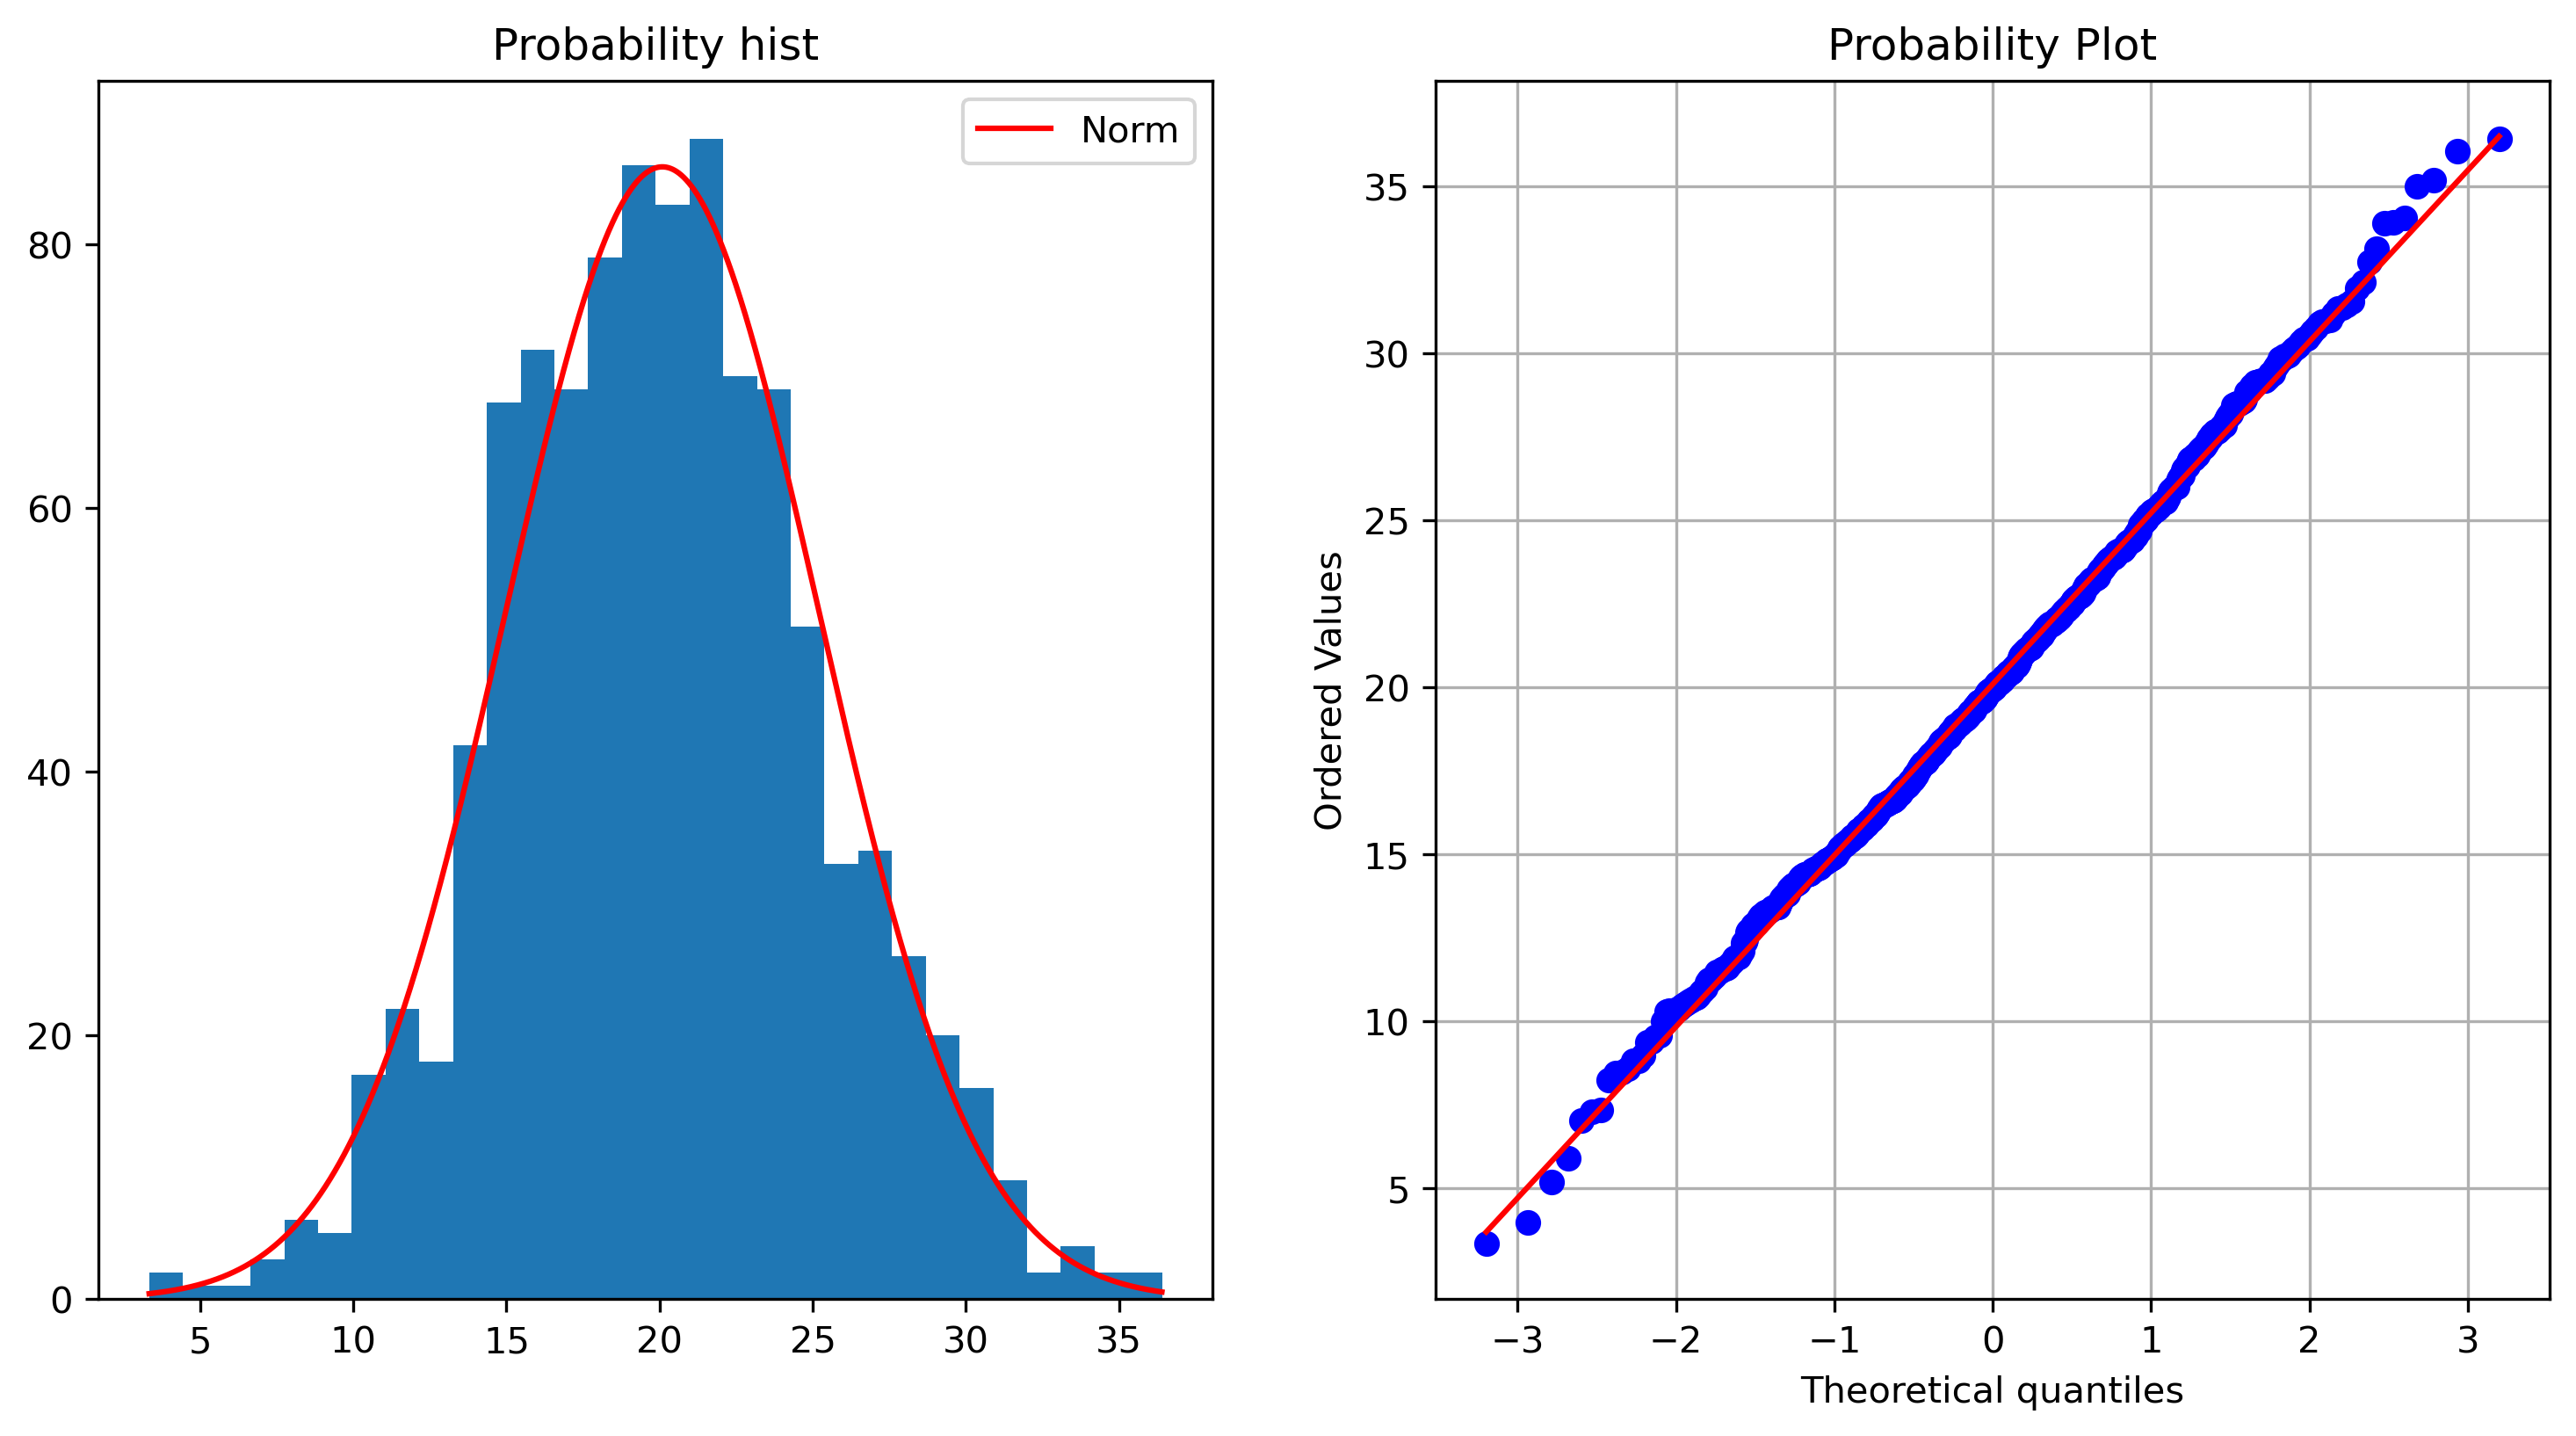

In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=300,
    figsize=(12, 6)
)

sample = np.random.normal(loc=20, scale=5, size=1000)

counts, bins, _ = ax1.hist(sample, bins=30)

x = np.arange(sample.min(), sample.max(), 0.01)
y_norm = stats.norm.pdf(x, loc=sample.mean(), scale=sample.std())
y_norm = y_norm * sample.shape[0] * (bins[1] - bins[0])
ax1.plot(x, y_norm, label='Norm', c='r')
ax1.set_title('Probability hist')
ax1.legend()

stats.probplot(sample, dist='norm', plot=ax2)
ax2.grid()

plt.show()

Красная прямая на QQ-plot отражает зависимость квантилей нормального распределения с $\bar{X}$ и $sd$ реальной выборки от квантилей теоретического нормального распределения с $\bar{X} = 0$ и $sd = 1$.

Точки на графике отражают значения элементов выборки по оси Y и их значения в распределении, представленном на оси X (в нашем случае это Z-шкала).  
Таким образом, по распределению точек мы можем сделать вывод о близости распределения к нормальному:
- Точки, находящиеся выше прямой: значения в выборке больше, чем на том же квантиле в теоретическом распределении.
- Точки, находящиеся ниже прямой: значения в выборке меньше, чем на том же квантиле в теоретическом распределении.

#### Тесты

Тест Колмогорова-Смирнова - тест, объединяющий критерии Колмогорова (проверка гипотезы о соответствии эмпирического распределения предполагаемой модели) и Смирнова (проверка гипотезы о принадлежности двух выборок одному закону распределения).  
В этом тесте сопоставляются частоты разрядов: сначала первого, затем 1 + 2 разрядов, 1 + 2 + 3 и т.д., таким образом, сопоставляются кумулятивные функции распределения частоты.  
Ограничения:
- Следует применять с поправкой Большева, в особенности для n < 25.

Тест Шапиро-Уилка - тест, проверяющий нормальность распределения случайной величины. Является одним из наиболее эффективных криетриев проверки нормальности.
$$\large W = \frac{1}{s^2} \Big [\sum_{i = 1}^n a_{n - i + 1}(x_{n - i + 1} - x_i) \Big ]^2 $$
$\large s^2 = \sum_{i = 1}^n (x_i - \bar{X})^2$, а коэффициенты $\large a_{n - i + 1}$ - табличные значения.

D'Agostino Pearson's test

In [55]:
import scipy.stats as stats

# Колмогорова-Смирнова для одной выборки
ks_res = stats.ks_1samp(
    sample,
    stats.norm.cdf,
    args=(sample.mean(), sample.std())
)

shapiro_res = stats.shapiro(sample)

normaltest_res = stats.normaltest(sample)

# goodness_of_fit

# power_divergence

print(f'Колмогорова-Смирнова: p = {ks_res.pvalue}')
print(f'Шапиро-Уилка: p = {shapiro_res.pvalue}')
print(f'D\'Agostino Pearson: p = {normaltest_res.pvalue}')

Колмогорова-Смирнова: p = 0.8410185362878713
Шапиро-Уилка: p = 0.27805086152874886
D'Agostino Pearson: p = 0.2966337459003089
